# Optimizing Customer Retention: Boosting Profitability with Machine Learning

#### Created By: Cinira Harsaning Aziz, Inggartista Abi Gumintang, Hans Christian Don

## 1 Business Problem Understanding

### 1.1 Context

An online retail company provides a platform where sellers and customers can conduct transactions through a website or mobile app. The company generates revenue from each transaction, making customer growth vital for profitability.

There are two main strategies to sustain profit growth: `retaining` existing customers and `acquiring` new ones. However, research shows that acquiring new customers can cost up to five times more than retaining current ones [[1]](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers). According to Harvard Research, increasing the customer retention rate by 5% can boost revenue by 25% to 95%. This emphasizes the critical role of customer retention in business success.

As a result, focusing on customer retention becomes essential. By identifying potential churn early and offering targeted interventions, businesses can strengthen relationships with existing customers and increase overall revenue.

### 1.2 Problem Statement

To minimize customer churn and optimize marketing costs, companies must develop machine learning-driven strategies that accurately identify at-risk customers. By leveraging data to predict which customers are likely to churn, businesses can ensure that their marketing efforts are highly targeted, reducing unnecessary spending while maximizing return on investment. A data-driven approach helps prevent inefficient allocation of resources, which can hinder profitability.

Many companies, particularly in sectors like auto insurance, still rely on generalized marketing strategies. This one-size-fits-all method often leads to overspending on low-value customers while underinvesting in high-value ones. Without precise churn prediction, marketing strategies can become inefficient, leading to higher costs and lower profitability.

In the competitive e-commerce market, machine learning models can help businesses better understand customer behavior and predict churn. By identifying high-risk customers and focusing promotional offers on them, companies can avoid operational losses from promoting to customers unlikely to churn. Targeted promotions, powered by predictive analytics, ensure that marketing budgets are used efficiently and effectively.

By adopting machine learning for churn prediction and marketing optimization, e-commerce companies can improve customer retention, reduce marketing costs, and enhance overall profitability.

### 1.3 Goals

- `Predict Customer Churn:` Develop a predictive model to identify customers likely to churn, enabling focused marketing efforts and reducing wasted budget on low-risk customers.
- `Optimize Marketing Spend:` Allocate marketing budgets more efficiently by prioritizing promotions for high-risk customers, minimizing unnecessary costs while maximizing retention.
- `Identify Cost-Effective Churn Factors:` Analyze key factors driving churn to inform strategic decisions, allowing for more targeted and cost-effective marketing initiatives that enhance customer loyalty.

### 1.4 Analytic Approach

We will analyze the data to identify patterns that distinguish between customers who are likely to churn and those who are not. Based on these insights, we will develop a classification model to predict the probability of customer churn. This model will assist the company in accurately forecasting which customers are at risk of leaving, enabling more effective and targeted retention strategies.

### 1.5 Metric Evaluation

![Confussion Matrix](https://www.nbshare.io/static/snapshots/cm_colored_1-min.png)

- True Positive (TP): Customer predicted to churn, and they actually churned.
- False Positive (FP): Customer predicted to churn, but they did not.
- False Negative (FN): Customer predicted not to churn, but they did.
- True Negative (TN): Customer predicted not to churn, and they didn't.

`Prediction errors can occur as follows:`
- Type 1 error (False Positive): Results in operational loss due to unnecessary promo costs for customers who wouldn’t churn.
- Type 2 error (False Negative): Leads to profit loss as churned customers are missed.

`Target:`
- 0: Customer does not churn
- 1: Customer churn

In this case, minimizing False Negatives (Type 2 errors) is critical, as losing customers impacts the company’s long-term viability. However, controlling False Positives (Type 1 errors) is also important to avoid overspending on unnecessary promotions. Balancing both is key, but the focus leans toward churn prevention.

F2 Score:

To address this balance, the F2 score is used, which places more importance on recall (correctly identifying customers who churn) than precision. This helps prioritize reducing Type 2 errors (missed churns), which is crucial in churn prediction scenarios.

The F2 score is calculated as:

`F2 = (5 * Precision * Recall) / (4 * Precision + Recall)`

Where:
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)

Using the F2 score ensures that the model focuses more on identifying customers who are at risk of churning, even if it results in a slight increase in False Positives.

## 2 Data Understanding

### 2.1 Dataset

The dataset belongs to a leading online E-Commerce company that aims to identify customers who are likely to churn, allowing them to offer targeted promotions to retain these customers. The data includes various customer-related features such as `Tenure`, `PreferredLoginDevice`, `CityTier`, `SatisfactionScore`, and `OrderCount`.

Potential Insights and Development Areas:
- Customer Segmentation: Use `CityTier`, `PreferredOrderCat`, and `PreferredPaymentMode` to segment customers and tailor promotions.
- Churn Prediction: Features like `Tenure`, `SatisfactionScore`, and `DaySinceLastOrder` can help predict churn, enabling proactive retention strategies.
- Behavioral Analysis: Analyzing `HourSpendOnApp`, `Complain`, and `OrderAmountHikeFromlastYear` can provide insights into customer engagement and satisfaction.
- Targeted Marketing: By understanding patterns in `CouponUsed` and `CashbackAmount`, the company can optimize their promotional offers.

This data provides a solid foundation for developing predictive models and customer retention strategies.

Source: [link](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction?resource=download)

### 2.2 Attribute Information

| Attribute | Data Type | Description |
| ----- | ------- | -------- |
| CustomerID | Numeric | Unique identifier for each customer |
| Churn | Numeric | Indicator of customer churn (1 for churned, 0 for not) |
| Tenure | Numeric | Duration (in months) the customer has been with the company |
| PreferredLoginDevice | Categorical | Device preferred by the customer for login |
| CityTier | Numeric | Tier level of the customer's city |
| WarehouseToHome | Numeric | Distance from the warehouse to the customer's home (in km) |
| PreferredPaymentMode | Categorical | Preferred payment method of the customer |
| Gender | Categorical | Gender of the customer |
| HourSpendOnApp | Numeric | Total hours spent on the app or website |
| NumberOfDeviceRegistered | Numeric | Number of devices registered under the customer's account|
| PreferedOrderCat | Categorical | Preferred order category in the last month |
| SatisfactionScore | Numeric | Customer's satisfaction score |
| MaritalStatus | Categorical | Marital status of the customer |
| NumberOfAddress | Numeric | Number of addresses associated with the customer |
| Complain | Numeric | Indicator of any complaints raised in the last month (1 for yes, 0 for no) |
| OrderAmountHikeFromlastYear | Numeric | Percentage increase in order amount compared to last year |
| CouponUsed | Numeric | Number of coupons used in the last month |
| OrderCount | Numeric | Number of orders placed in the last month |
| DaySinceLastOrder | Numeric | Number of days since the last order was placed |
| CashbackAmount | Numeric | Average cashback received in the last month |

### 2.3 Library & Data

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import sys
import warnings

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import missingno
from IPython.display import display

# Feature Engineering Libraries
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce  # For binary encoding

# Model Selection and Classification Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier, VotingClassifier, StackingClassifier, 
    BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
)
from xgboost import XGBClassifier
import lightgbm as lgb

# Model Evaluation Metrics
from sklearn.metrics import (
    f1_score, accuracy_score, recall_score, precision_score, 
    roc_curve, roc_auc_score, classification_report, make_scorer, fbeta_score
)

# Model Selection and Cross-Validation Tools
from sklearn.model_selection import (
    GridSearchCV, StratifiedKFold, RandomizedSearchCV, 
    train_test_split, cross_val_score
)

# Handling Imbalanced Datasets
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import (
    RandomOverSampler, ADASYN, SMOTE, BorderlineSMOTE, SVMSMOTE
)
from imblearn.under_sampling import (
    ClusterCentroids, RandomUnderSampler, NearMiss, TomekLinks, 
    CondensedNearestNeighbour, EditedNearestNeighbours
)

# Statistical Test
from scipy.stats import normaltest

# SHAP for Model Explainability
import shap

# Ignore Warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set display option to show all columns
pd.set_option('display.max_columns', None)

c:\Users\m s i\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read the Excel file into a DataFrame using pandas
df = pd.read_excel('churn.xlsx')

In [3]:
# Display the first 5 rows and the last 5 rows of the DataFrame `df`
display(df.head(), df.tail())

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


In [4]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### 2.4 Data Cleaning

#### 2.4.1 Drop CustomerID

We typically remove the 'CustomerID' column because it is often a unique identifier that doesn't provide any meaningful information for analysis or model training. Since it doesn't contribute to patterns or correlations with other features, keeping it might introduce unnecessary complexity or noise in the data.

In [5]:
df.drop(['CustomerID'],axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

#### 2.4.2 Handling Incosistent Data

In [7]:
# Define the mapping for standardizing the 'PreferredLoginDevice' column
login_device_mapping = {
    'Phone': 'Mobile Phone',
    'Mobile': 'Mobile Phone',
    # Add other mappings if necessary
}

# Apply the mapping to the 'PreferredLoginDevice' column
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace(login_device_mapping)

# Verify the changes
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64

Summary:
- `Standardization Process:`
    - The 'PreferredLoginDevice' column was standardized using a mapping dictionary to unify the various terms for login devices.

- `Mapping Applied:`
    - Terms like 'Phone' and 'Mobile' were standardized to 'Mobile Phone'.
    - Other device types were left unchanged.

- `Post-Standardization Distribution:`
    - Mobile Phone: 3996 entries
    - Computer: 1634 entries

The standardization has consolidated various terms into consistent categories, with 'Mobile Phone' being the most common device type in the dataset.

In [8]:
# Define the mapping for standardizing the 'PreferredPaymentMode' column
payment_mode_mapping = {
    'COD': 'Cash on Delivery',
    'Cash on Delivery': 'Cash on Delivery',
    'CC': 'Credit Card',
    'Credit Card': 'Credit Card',
    # Add other mappings if necessary
}

# Apply the mapping to the 'PreferredPaymentMode' column
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(payment_mode_mapping)

# Verify the changes
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

Summary:
- `Standardization Process:`
    - The PreferredPaymentMode column was standardized using a mapping dictionary to unify the various terms for payment methods.

- `Mapping Applied:`
    - Terms like 'COD' and 'Cash on Delivery' were standardized to 'Cash on Delivery'.
    - 'CC' and 'Credit Card' were standardized to 'Credit Card'.
    - Other payment modes were left unchanged.

- `Post-Standardization Distribution:`
    - Debit Card: 2099 entries
    - Credit Card: 1596 entries
    - E wallet: 562 entries
    - Cash on Delivery: 457 entries
    - UPI: 360 entries

The standardization has consolidated various terms into consistent categories, with 'Debit Card' being the most common payment mode in the dataset.

In [9]:
# Define the mapping for standardizing the 'PreferedOrderCat' column
order_cat_mapping = {
    'Mobile': 'Mobile Phone',
    'Mobile Phone': 'Mobile Phone',
    # Add other mappings if necessary
}

# Apply the mapping to the 'PreferedOrderCat' column
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(order_cat_mapping)

# Verify the changes
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64

Summary:
- `Standardization Process:`
    - The PreferedOrderCat column was standardized using a mapping dictionary to ensure consistent categorization of order types.

- `Mapping Applied:`
    - The term 'Mobile' was standardized to 'Mobile Phone'.
    - 'Mobile Phone' entries were kept as 'Mobile Phone'.

- `Post-Standardization Distribution:`
    - Mobile Phone: 1856 entries
    - Laptop & Accessory: 1847 entries
    - Fashion: 763 entries
    - Grocery: 366 entries
    - Others: 242 entries

The standardization has consolidated the category 'Mobile' into 'Mobile Phone', resulting in a consistent and clear representation of order categories. 'Mobile Phone' and 'Laptop & Accessory' are the most common categories in the dataset.

#### 2.4.3 Check Duplicate

In [10]:
df.duplicated().sum()

557

In [11]:
# Calculate the percentage of duplicated rows directly and round to 2 decimal places
percentage_duplicated = round((df.duplicated().sum() / len(df)) * 100, 2)

# Display the result
percentage_duplicated

9.89

In [12]:
# Remove duplicate rows
df_new = df.drop_duplicates()

# Verify the number of rows after removing duplicates
df_new.shape

(5073, 19)

Summary:
- 9.88% of the data were duplicates.
- After removing duplicates, the DataFrame size reduced from 5630 rows to 5074 rows, indicating that a significant proportion of data (about 10%) was duplicated.
- Removing duplicates is crucial for ensuring the accuracy and quality of your dataset, preventing any bias or redundancy in your analyses.

#### 2.4.4 Check Outliers

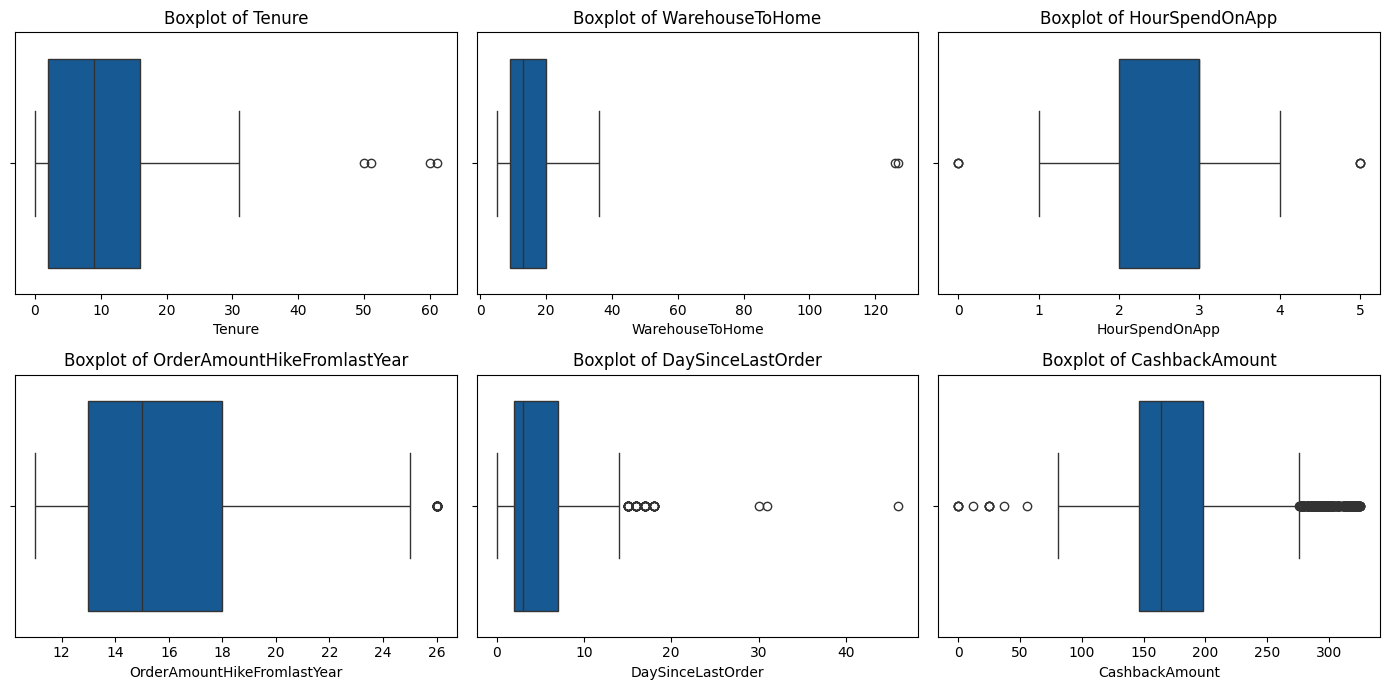

In [13]:
# List of columns to check for outliers
columns_to_check = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'DaySinceLastOrder', 'CashbackAmount']

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Create horizontal boxplots for each column
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_new[column], color='#035AA6FF')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [14]:
# Assuming df_new is your DataFrame and features is a list of column names to check
features = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'DaySinceLastOrder', 'CashbackAmount']

# Iterate through each feature to calculate bounds and outliers
for feature in features:
    Q1 = df_new[feature].quantile(0.25)
    Q3 = df_new[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    condition = (df_new[feature] < lower_bound) | (df_new[feature] > upper_bound)
    outlier_count = df_new.loc[condition, feature].count()  # Use df_new here
    percentage_outlier = (outlier_count / len(df_new)) * 100  # Use len(df_new) for percentage calculation

    print(f'''Lower Bound for {feature} is {round(lower_bound, 2)}, and Upper Bound is {round(upper_bound, 2)}.
              There are {outlier_count} outliers, which constitutes {round(percentage_outlier, 2)}% of the data.''')
    print('\n')  # Add a newline for better readability


Lower Bound for Tenure is -19.0, and Upper Bound is 37.0.
              There are 4 outliers, which constitutes 0.08% of the data.


Lower Bound for WarehouseToHome is -7.5, and Upper Bound is 36.5.
              There are 2 outliers, which constitutes 0.04% of the data.


Lower Bound for HourSpendOnApp is 0.5, and Upper Bound is 4.5.
              There are 6 outliers, which constitutes 0.12% of the data.


Lower Bound for OrderAmountHikeFromlastYear is 5.5, and Upper Bound is 25.5.
              There are 29 outliers, which constitutes 0.57% of the data.


Lower Bound for DaySinceLastOrder is -5.5, and Upper Bound is 14.5.
              There are 57 outliers, which constitutes 1.12% of the data.


Lower Bound for CashbackAmount is 67.85, and Upper Bound is 276.01.
              There are 382 outliers, which constitutes 7.53% of the data.




- CashbackAmount:
     - Outliers: 7.53%
     - Bounds: Lower: 67.86, Upper: 276.0
     - Insight: High outlier percentage indicates variability likely due to the loyalty program. Significant cashback amounts may reflect customer engagement and loyalty, crucial for churn prediction.

- Other Features:
    - Outliers Range: 0.04% to 1.12%
    - Insight: Minimal outliers in these features indicate stable distributions, with natural variability that’s unlikely to distort data analysis.

- Summary
     - Outliers in CashbackAmount are significant due to their potential role in reflecting customer engagement. Other features show minimal outliers, suggesting a stable data distribution.

#### 2.4.5 Check Missing Value

In [15]:
# Gather column details into a list
listItem = [
    [
        col,  # Column name
        df[col].dtype,  # Data type
        len(df),  # Total number of entries
        df[col].isna().sum(),  # Missing values count
        round(df[col].isna().mean() * 100, 2),  # Percentage of missing values
        df[col].nunique(),  # Unique value count
        df[col].drop_duplicates().sample(2).tolist()  # Sample of 2 unique values
    ]
    for col in df.columns
]

# Create a DataFrame summarizing column information
dfDesc = pd.DataFrame(
    listItem,
    columns=['Column', 'Data Type', 'Data Count', 'Missing Value', 'Missing Value (%)', 'Number of Unique', 'Unique Sample']
)

# Display the summary DataFrame
dfDesc

,Column,Data Type,Data Count,Missing Value,Missing Value (%),Number of Unique,Unique Sample
0,Churn,int64,5630,0,0.00,2,"[0, 1]"
1,Tenure,float64,5630,264,4.69,36,"[3.0, 21.0]"
2,PreferredLoginDevice,object,5630,0,0.00,2,"[Mobile Phone, Computer]"
3,CityTier,int64,5630,0,0.00,3,"[1, 2]"
4,WarehouseToHome,float64,5630,251,4.46,34,"[5.0, 11.0]"
5,PreferredPaymentMode,object,5630,0,0.00,5,"[Credit Card, UPI]"
6,Gender,object,5630,0,0.00,2,"[Male, Female]"
7,HourSpendOnApp,float64,5630,255,4.53,6,"[2.0, 1.0]"
8,NumberOfDeviceRegistered,int64,5630,0,0.00,6,"[4, 5]"
9,PreferedOrderCat,object,5630,0,0.00,5,"[Fashion, Laptop & Accessory]"


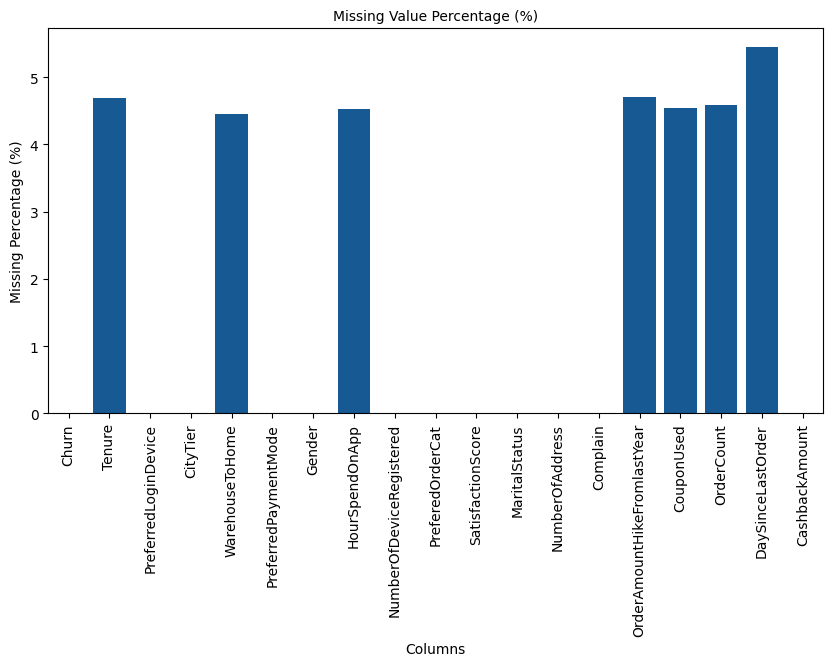

In [16]:
# Calculate missing values and their percentage
missing_data = df.isna().sum()
missing_percentage = (missing_data / len(df)) * 100

# Create a DataFrame for plotting
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Values': missing_data,
    'Missing Percentage': missing_percentage
})

# Plotting the bar chart
plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x='Column', y='Missing Percentage', data=missing_df, color='#035AA6FF')

# Rotate x-axis labels to be vertical
plt.xticks(rotation=90, fontsize=10)

# Set labels and title
plt.xlabel('Columns', fontsize=10)
plt.ylabel('Missing Percentage (%)', fontsize=10)
plt.title('Missing Value Percentage (%)', fontsize=10)

# Show the plot
plt.show()

- Columns such as Churn, PreferredLoginDevice, CityTier, PreferredPaymentMode, Gender, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, and CashbackAmount have no missing values.
- Columns like Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, and DaySinceLastOrder have between 4.46% and 5.45% missing values, with the highest missing values observed in `DaySinceLastOrder` (5.45%).

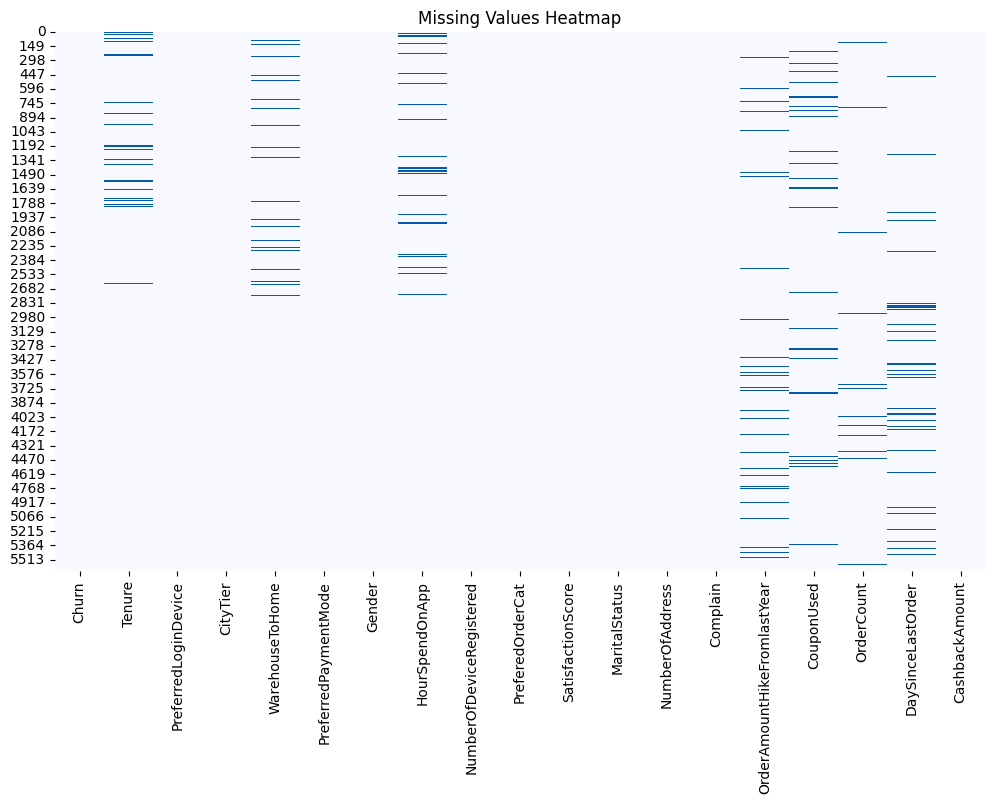

In [17]:
# Create a custom color map with the updated blue color
cmap = sns.color_palette(["ghostwhite", "#035AA6FF"])

# Create a heatmap for missing values
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap=cmap)
plt.title('Missing Values Heatmap')
plt.show()

The heatmap shows that missing values are randomly distributed across the dataset, without any specific pattern or clustering in one particular area.

We have conducted a thorough check for missing values across our dataset. To address these missing values, we will perform imputation during the pipelining process. Specifically, we will use the KNNImputer within our pipeline to handle missing data consistently and efficiently. This step ensures that missing values are appropriately addressed before applying further transformations such as scaling. This approach aims to maintain the integrity and quality of the data throughout the preprocessing pipeline.

## 3 Exploratory Data Analysis

### 3.1 Comparison of Churn vs Non-Churn

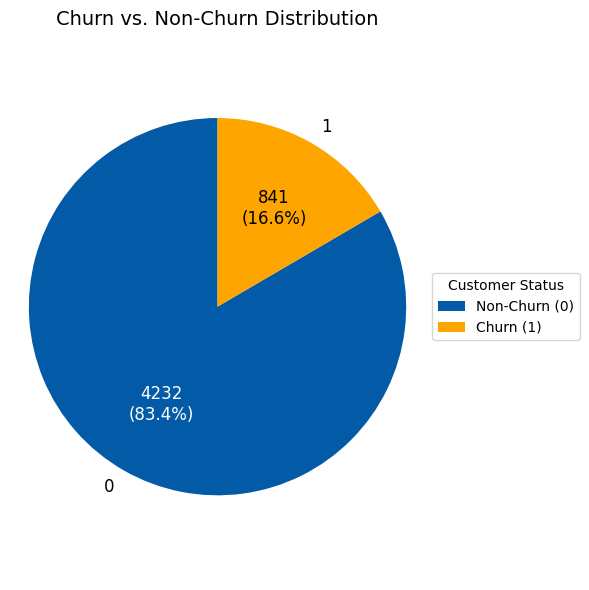

In [81]:
# Calculate the number of churn and non-churn customers
churn_counts = df_new['Churn'].value_counts()
churn_labels = churn_counts.index  # Keep using 0 and 1 as labels on the pie chart
churn_sizes = churn_counts.values  # Define churn_sizes based on value counts

# Function to display absolute values and percentages
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f'{absolute}\n({pct:.1f}%)'

# Colors for the pie chart
colors = ['#035AA6FF', '#FFA500']  # Non-Churn in #035AA6FF, Churn in #FFA500

# Create pie chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(churn_sizes, labels=churn_labels, autopct=lambda pct: func(pct, churn_sizes), 
                                  colors=colors, startangle=90, textprops={'fontsize': 12})
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Add a title
plt.title('Churn vs. Non-Churn Distribution', fontsize=14)

# Change label color for Non-Churn (0) to white
for i, label in enumerate(churn_labels):
    if label == 0:  # Check if the label is Non-Churn (0)
        autotexts[i].set_color("white")  # Change the label color to white

# Add a legend outside the chart
plt.legend(title="Customer Status", loc="center left", bbox_to_anchor=(1, 0.5), labels=['Non-Churn (0)', 'Churn (1)'])

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


Highligt:
Churn constitutes 16.6% of your customer base, while 83.4% are not churning. This indicates that a relatively small but significant portion of customers are leaving. Potential actions could include:
- Customer Segmentation: Focus on identifying patterns within the 16.6% to target high-risk customers with retention efforts.
- Churn Prediction Accuracy: Given the imbalance, consider techniques like resampling to ensure your model captures the churn behavior effectively.
- Retention Strategy: Develop personalized campaigns or loyalty programs to prevent further churn and increase customer lifetime value.

### 3.2 Data Distribution Analysis

In [82]:
columns = ['Churn', 'Tenure', 'WarehouseToHome', 
           'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
           'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']
distribution = []
for col in columns:
    stats, pval = normaltest(df_new[col])
    if pval > 0.05:
        distribution.append('normal')
    else:
        distribution.append('not normal')

pd.DataFrame({'distribution': distribution}, index=columns).T

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
distribution,not normal,not normal,not normal,not normal,not normal,not normal,not normal,not normal,not normal,not normal


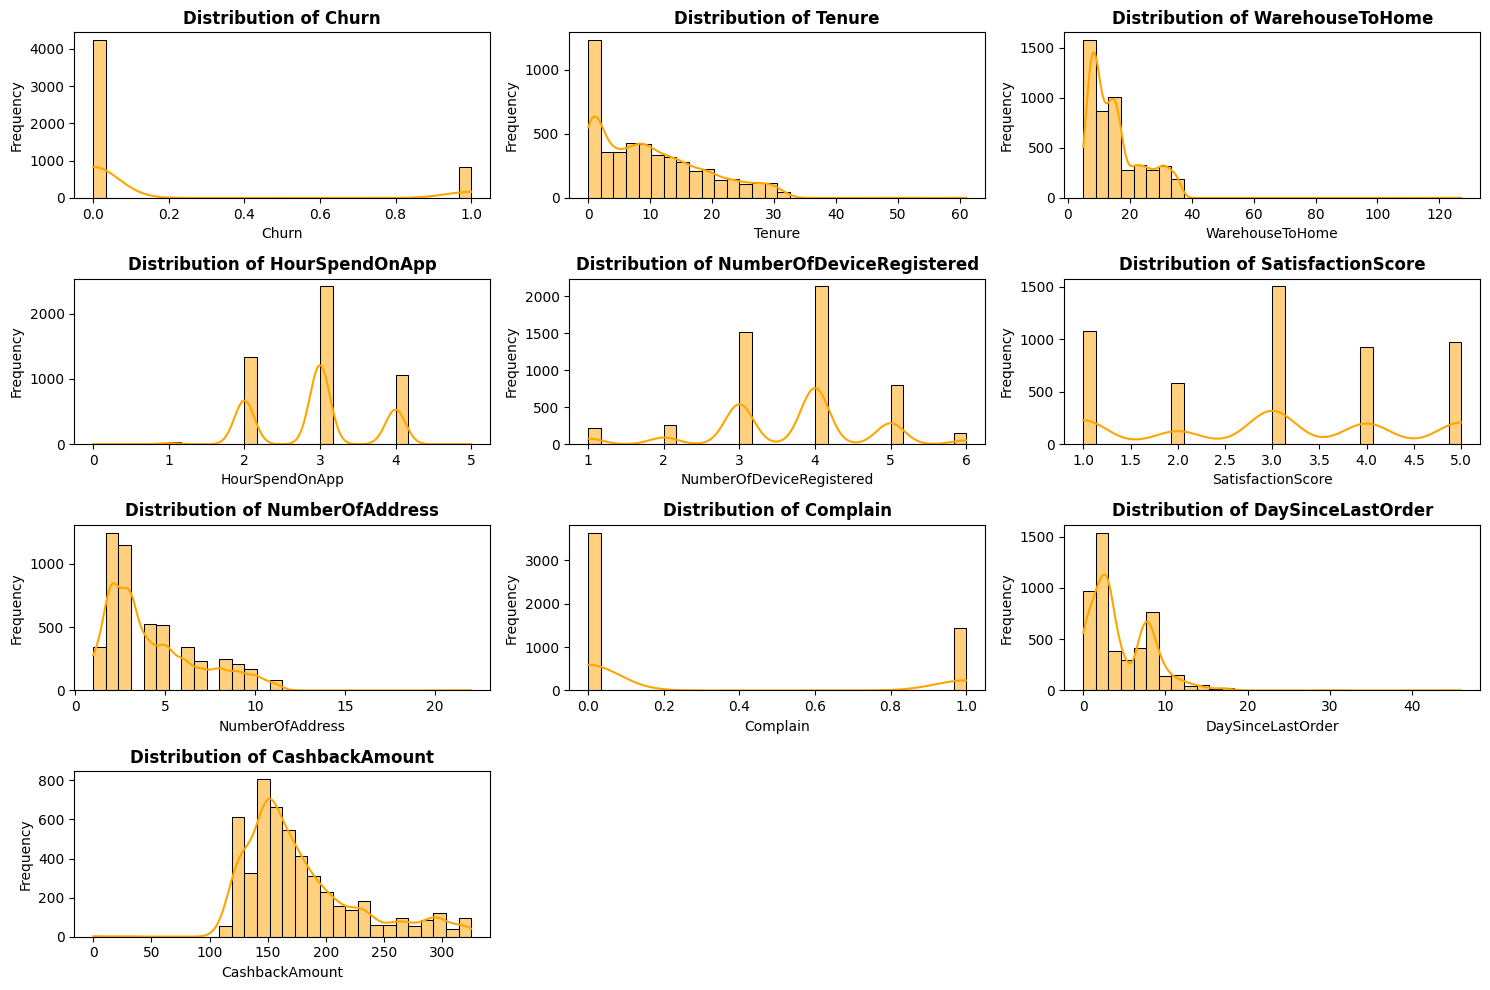

In [83]:
# Define the columns to visualize
columns = ['Churn', 'Tenure', 'WarehouseToHome', 
           'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
           'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']


# Plot histograms
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)  # Adjust the grid size as needed
    sns.histplot(df_new[col], kde=True, bins=30, color='#FFA500')
    plt.title(f'Distribution of {col}', weight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


`Highlight:`
All key features, including Churn, Tenure, WarehouseToHome, and others, show non-normal distributions according to the normality test (p > 0.05). This suggests that non-parametric techniques or algorithms that do not assume normality, such as decision trees, random forests, or gradient boosting, may be more suitable for the model. Additionally, robust scaling techniques will be necessary to handle the skewness in the data during preprocessing.

### 3.3 Correlation Analysis

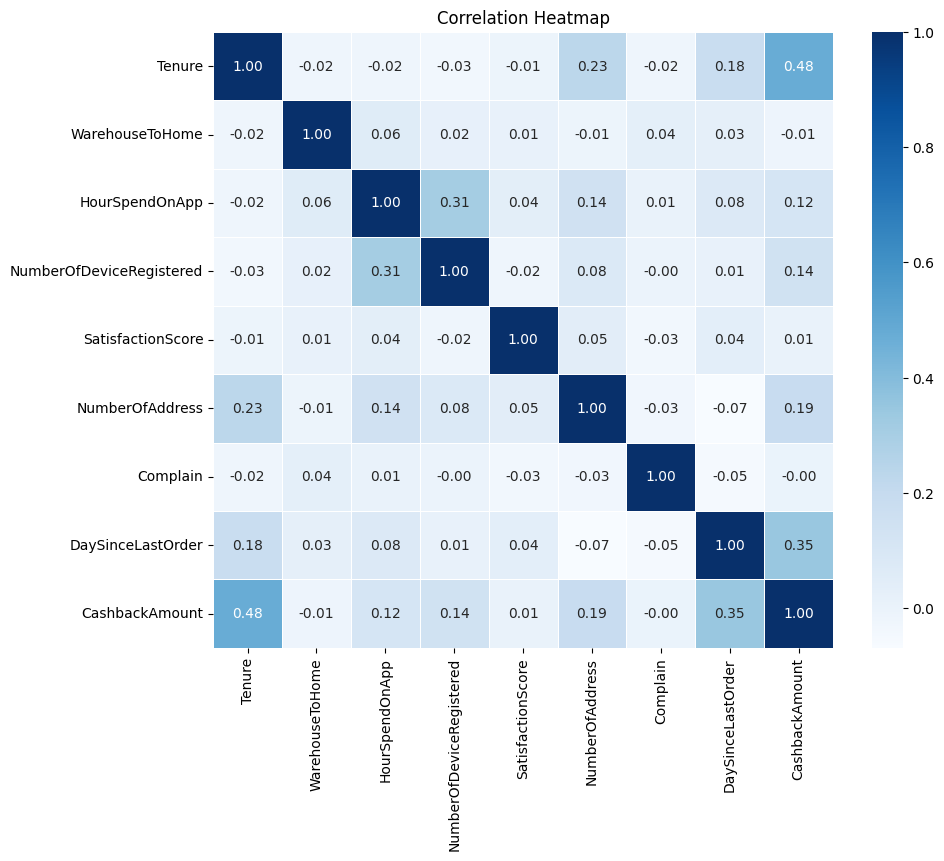

In [84]:
# Define the columns to visualize
columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 
           'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']

# Calculate the correlation matrix
corr_matrix = df_new[columns].corr()

# Use a more gradual color palette for the heatmap
cmap = sns.color_palette("Blues", as_cmap=True)  # Gradual blue color palette

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


`Highlight:`
- Weak Correlations: Correlations between variables are generally weak, indicating no strong linear relationships.
- Variability: The lack of strong correlations suggests the potential presence of non-linear or complex relationships not captured by linear correlation.
- Potential Factors: Low correlations may imply other influencing factors not visible in the current analysis.
- Inconsistent Correlations: Small correlations might indicate that variables do not directly impact each other and may need further investigation.
- Limitations of Correlation: Correlation alone does not establish causation, and variables may still influence each other in complex ways.

### 3.4 Customer Churn Analysis by Key Preferences

Customer preferences reflect the specific **likes, needs, and desires** that influence their decisions when interacting with a product or service. By analyzing preferences such as ``Product categories``, ``Payment Methods``, ``Login Devices``, and ``Satisfaction Scores``, the company can leverage this information to enhance the overall customer experience. These insights can be used to fine-tune offerings, improving the customer experience while also providing guidance on the most effective channels to focus on, ultimately helping to reduce churn and increase customer retention.

#### 3.4.1 Churn vs. Non Churn by Preferred Login Device

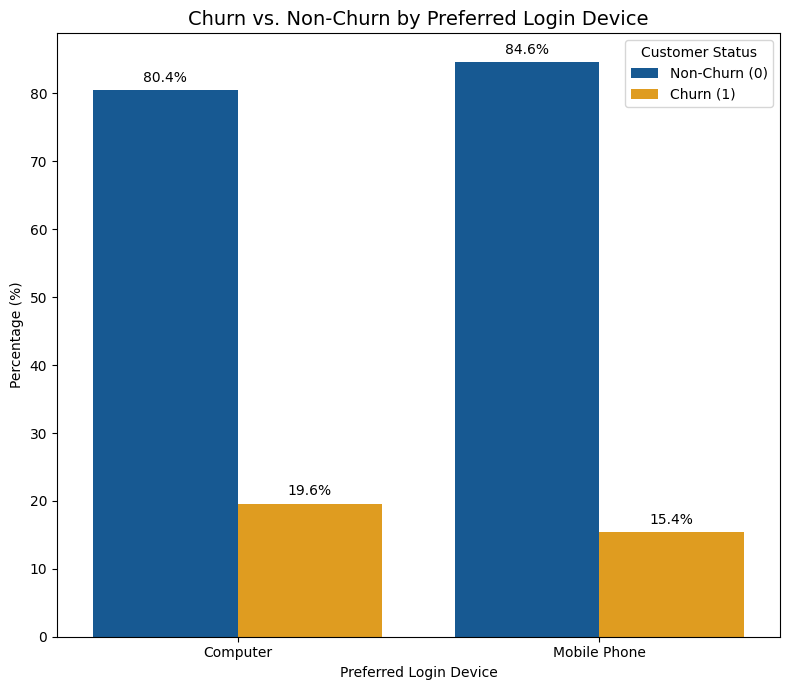

In [85]:
# Group by PreferredLoginDevice and Churn, then calculate count
device_churn = df_new.groupby(['PreferredLoginDevice', 'Churn']).size().reset_index(name='count')

# Calculate the percentage of churn and non-churn per device
device_churn['percentage'] = device_churn.groupby('PreferredLoginDevice')['count'].transform(lambda x: x / x.sum() * 100)

# Create the bar chart
plt.figure(figsize=(8, 7))
ax = sns.barplot(
    x='PreferredLoginDevice', 
    y='percentage', 
    hue='Churn', 
    data=device_churn, 
    palette={0: '#035AA6FF', 1: '#FFA500'}
)

# Add title and axis labels
plt.title('Churn vs. Non-Churn by Preferred Login Device', fontsize=14)
plt.xlabel('Preferred Login Device')
plt.ylabel('Percentage (%)')

# Add legend with appropriate title and labels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, title='Customer Status', labels=['Non-Churn (0)', 'Churn (1)'])

# Add percentage labels on top of each bar (conditionally if height > 0)
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate bars with height greater than 0
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9),  # Offset label above the bar
                    textcoords='offset points')

# Adjust layout to prevent label clipping
plt.tight_layout()

# Show the chart
plt.show()

`Key Highlight:`
- Mobile Phone is the most frequently used login device, significantly more popular than Computer.
- Churn Analysis:
    - Mobile Phone: 556 churned out of 3616 total users (3060 non-churned + 556 churned) results in a churn rate of approximately 15.4%.
    - Computer: 285 churned out of 1457 total users (1172 non-churned + 285 churned) results in a churn rate of approximately 19.6%.
    - Despite the higher absolute number of churned users on Mobile Phone, the churn rate for Computer is higher, indicating that although more users churn on Mobile Phone, it is relatively better compared to Computer.

`Action Plan:`
- Focus on Mobile Optimization: Enhance mobile login and payment experiences to leverage the high usage of Mobile Phones. Implement features that facilitate quick and easy transactions.
- Integrate Mobile Banking Solutions: Incorporate mobile banking options to streamline payment processes, aiming to boost user conversion rates and drive revenue.
- Maintain Support for Computers: Continue to support Computer users to ensure inclusivity, but prioritize Mobile Phone enhancements to align with user preferences and technological trends.
- Comparative Analysis: Further analyze data on Preferred Payment Mode and Preferred Order Category to refine strategies and ensure a comprehensive approach across all touchpoints.

This approach will help in increasing user satisfaction and conversion rates, and address the churn effectively by focusing on areas with the greatest potential for improvement.

#### 3.4.2 Churn Rates by Preferred Payment Mode

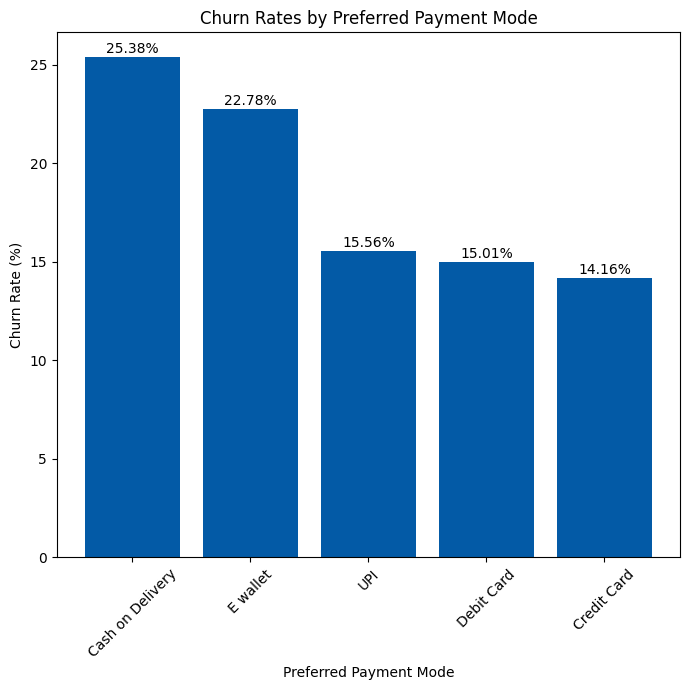

In [86]:
# Group by
login_mode_churn = df_new.groupby('PreferredPaymentMode')['Churn'].value_counts().unstack()

# Calculate churn rates
login_mode_churn_rate = login_mode_churn.apply(lambda x: x[1] / (x[0] + x[1]) * 100, axis=1)

# Sort churn rates from highest to lowest
login_mode_churn_rate_sorted = login_mode_churn_rate.sort_values(ascending=False)

# Set figure size
plt.figure(figsize=(7, 7))

# Create the bar chart with specified color
plt.bar(login_mode_churn_rate_sorted.index, login_mode_churn_rate_sorted, color='#035AA6FF')

# Add labels and title
plt.title("Churn Rates by Preferred Payment Mode")
plt.xlabel("Preferred Payment Mode")
plt.ylabel("Churn Rate (%)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add percentage labels to each bar, positioned slightly higher
for i, (mode, rate) in enumerate(login_mode_churn_rate_sorted.items()):
    plt.text(i, rate + 0.2, f"{rate:.2f}%", ha="center")  # Adjusted the y-position

# Show the plot
plt.tight_layout()
plt.show()


`Key Highlight:`
- UPI Potential: UPI has a churn rate of approximately 15.6%, which is higher than Debit Card and Credit Card but lower than Cash on Delivery and E Wallet. This presents a potential opportunity to shift focus towards UPI.
- Comparative Churn Rate: While UPI’s churn rate is slightly higher than Debit Card and Credit Card, it is more favorable compared to Cash on Delivery and E Wallet. Given its growing popularity and the relatively lower churn rate, UPI is a promising candidate for increased focus.
- Cost Efficiency: UPI offers a cost advantage over Debit and Credit Cards due to the absence of maintenance costs associated with EDC machines. This can lead to significant savings on operational expenses related to payment processing.

`Action Plan:`
- Strengthen UPI Partnership:
    - Collaborate with UPI Providers: Explore partnership opportunities with UPI providers to offer exclusive promotions and cashback deals. This can incentivize users to adopt UPI for payments.
    - Promote UPI Usage: Highlight the benefits of UPI payments through targeted marketing campaigns, emphasizing ease of use and security.

- Optimize UPI Integration:
    - Enhance Payment Experience: Ensure that the UPI payment process is seamless and user-friendly to encourage adoption and reduce churn.
    - Technical Support: Work with UPI providers to address any technical issues or challenges that might affect the user experience.

- Incentivize UPI Payments:
    - Cashback Promotions: Implement cashback promotions specifically for UPI transactions to drive more users towards this payment method.
    - Exclusive Offers: Provide additional benefits for transactions made via UPI to make it more appealing compared to other payment methods.

- Monitor and Adjust:
    - Track Performance: Regularly monitor the impact of UPI-focused strategies on churn rates and payment preferences.
    - Adjust Strategies: Based on performance data, adjust marketing strategies and partnership terms to maximize effectiveness and user adoption.

By prioritizing UPI and leveraging strategic partnerships, you can enhance payment convenience, potentially lower churn rates, and boost overall user satisfaction and revenue.

#### 3.4.3 Churn Rates by Preferred Order Category

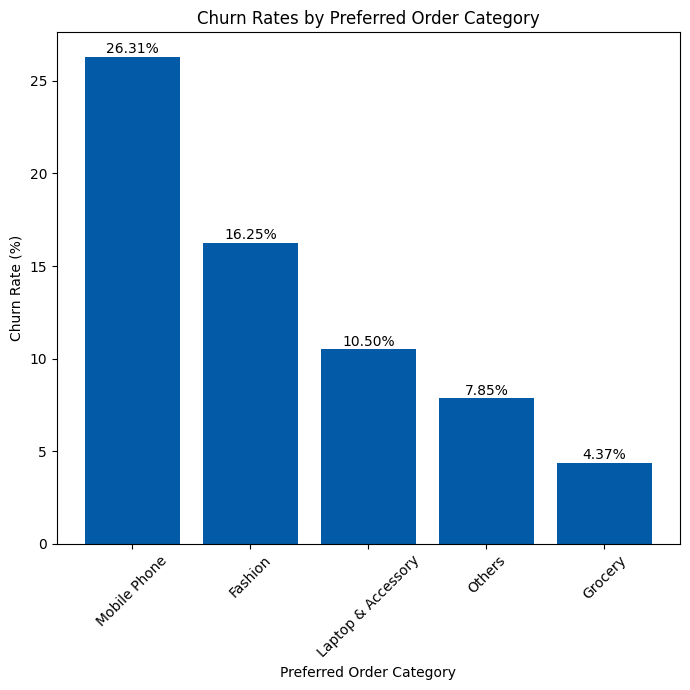

In [87]:
# Group by
order_mode_churn = df_new.groupby('PreferedOrderCat')['Churn'].value_counts().unstack()

# Calculate churn rates
order_mode_churn_rate = order_mode_churn.apply(lambda x: x[1] / (x[0] + x[1]) * 100, axis=1)

# Sort churn rates from highest to lowest
order_mode_churn_rate_sorted = order_mode_churn_rate.sort_values(ascending=False)

# Set figure size
plt.figure(figsize=(7, 7))

# Create the bar chart with specified color
plt.bar(order_mode_churn_rate_sorted.index, order_mode_churn_rate_sorted, color='#035AA6FF')

# Add labels and title
plt.title("Churn Rates by Preferred Order Category")
plt.xlabel("Preferred Order Category")
plt.ylabel("Churn Rate (%)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add percentage labels to each bar, positioned slightly higher
for i, (mode, rate) in enumerate(order_mode_churn_rate_sorted.items()):
    plt.text(i, rate + 0.2, f"{rate:.2f}%", ha="center")  # Adjusted the y-position

# Show the plot
plt.tight_layout()
plt.show()


`Key Highlights:`
- Laptop & Accessory Potential: The Laptop & Accessory category has a churn rate of about 15.6%, higher than Grocery and Others but lower than Mobile Phones and Fashion. This indicates a relatively stable customer base, suggesting an opportunity to focus more on this category due to its higher engagement and loyalty compared to the more volatile categories.
- High User Base: While Laptop & Accessory’s churn rate is higher than Grocery and Others category, it has one of the higher user size compared to Grocery & Others Category. Given its significant and stable user base, Laptop & Accessory is a promising category for increased focus. 

`Action Plan:`
- Product Diversification:
    - Expand Product Range: Introduce a wider variety of laptop and accessory products to cater to diverse customer preferences and needs.
    - Curate Product Selection: Ensure the product mix is well-curated and includes high-quality, trending items to attract and retain customers.

- Enhanced Customer Experience:
    - Personalized Recommendations: Utilize data analytics to provide personalized product recommendations based on customer browsing history and purchase behavior.
    - Improved Search Functionality: Optimize the search functionality on your platform to enable customers to easily find the desired products.

- Strategic Partnerships:
    - Brand Collaborations: Partner with renowned brands in the laptop and accessory industry to offer exclusive products and promotions.
    - Vendor Management: Establish strong relationships with reliable vendors to ensure consistent product availability and quality.

- Utilize Marketing Campaigns:
    - Social Media Advertising: Create visually appealing ads featuring laptops and accessories on platforms like Facebook, Instagram, and Pinterest, targeting users interested in technology and consumer electronics.
    - Display Advertising: Place banner ads on relevant websites and blogs to increase brand visibility and drive traffic to your e-commerce platform.

By focusing on product diversification, enhancing customer experience, building strategic partnerships, and implementing targeted marketing campaigns, the Laptop & Accessory category can effectively address the moderate churn rate and unlock its full potential. These initiatives will not only improve customer satisfaction but also drive revenue growth and strengthen the brand's position in the market.

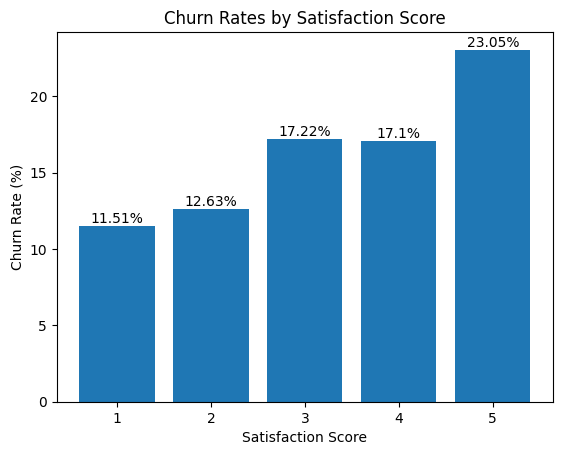

In [88]:
# Group by Satisfaction Score and count churn values
satisfaction_mode_churn = df_new.groupby('SatisfactionScore')['Churn'].value_counts().unstack()

# Calculate churn rates
satisfaction_mode_churn_rate = satisfaction_mode_churn.apply(lambda x: x[1] / (x[0] + x[1]) * 100, axis=1)

# Sort churn rates from highest to lowest
satisfaction_mode_churn_rate_sorted = satisfaction_mode_churn_rate.sort_values(ascending=False)

# Create bar chart
plt.bar(satisfaction_mode_churn_rate.index, satisfaction_mode_churn_rate.values)
plt.xlabel('Satisfaction Score')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rates by Satisfaction Score')

# Add labels above each bar
for i, v in enumerate(satisfaction_mode_churn_rate):
    plt.text(i+1, v+0.0, str(round(v, 2))+'%', ha='center', va='bottom')

# Show chart without grid
plt.show()

`Key Highlights:`

- Contradiction to General Hypothesis: Typically, a lower churn rate is associated with a high satisfaction rate. However, our data shows that customers with high satisfaction scores also exhibit high churn rates. This presents several possible explanations:
    - High Expectations: Customers with high satisfaction scores may have very high expectations for the product or service. If these expectations are not met, they might become disappointed more quickly and choose to discontinue use.
    - Lack of Engagement: High satisfaction scores do not necessarily correlate with frequent use of the product or service. Customers with high satisfaction might not be actively engaged, potentially due to emerging competitors or changing needs.
    - External Factors: Customers might leave due to external factors such as financial difficulties, shifting preferences, or relocation, rather than issues with the product or service itself.

`Action Plan:`
- Enhance Engagement: 
    Develop strategies to boost customer engagement, especially for those with high satisfaction scores. This could include offering special promotions, loyalty programs, or relevant content to keep them actively involved.
- Monitor Engagement Patterns: 
    Analyze usage patterns to identify why high-satisfaction customers may not be engaging frequently. Develop targeted interventions based on these insights, such as personalized offers or feature enhancements.
- Manage Expectations: 
    Maintain clear, transparent, and realistic communication with customers to set and manage expectations effectively. Avoid making promises that are difficult to fulfill, which could lead to disappointment.
- Address High Expectations: 
    Implement feedback loops to regularly gauge and adjust customer expectations, ensuring they align with what the company can deliver. This might involve regular surveys or one-on-one survey.

From this analysis, we can observe that even if customers have high satisfaction with the product or service, they still churn. This may indicate a lack of engagement, which later on will be explored further in the subsequent customer behavior analysis.

### 3.5 Customer Churn Analysis by Behavior

Customer behavior encompasses the **actions** and **customers** have with a product or service, including `time spent`, `tenure`, `days since last order`, `order count`, `coupon usage`, `cashback amount`, and `complaints`. Analyzing these metrics helps track and understand customer engagement patterns and evaluate the effectiveness of marketing strategies. By identifying signs of declining activity, companies can detect early churn indicators and assess how well marketing efforts to retain customers. This proactive approach ensures that companies address customer needs effectively, refine their marketing strategies, and prevent churn before it occurs, enhancing overall engagement and retention.

#### 3.5.1 Distribution of User Engagement by Other Relevant Variable

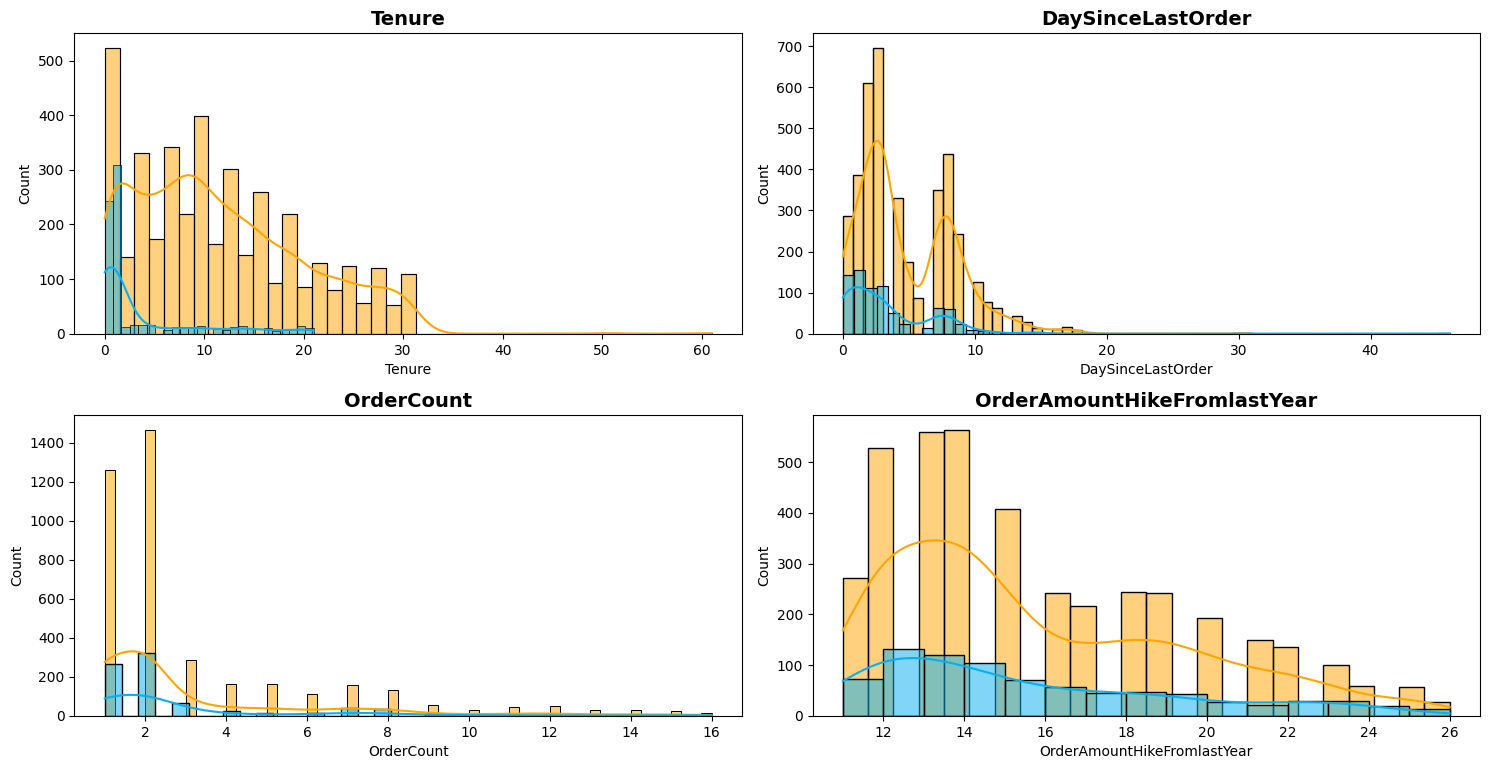

In [89]:
data_ = ["Tenure", "DaySinceLastOrder", "OrderCount", "OrderAmountHikeFromlastYear"]
a=1
sns.color_palette('pastel')
plt.figure(figsize=(15,15))

a=1
for i in data_:
    plt.subplot(4,2,a)
    sns.histplot(x=df_new[df_new["Churn"]==0][i],kde=True,color='#FFA500')
    sns.histplot(x=df_new[df_new["Churn"]==1][i],kde=True,color='#05AFF2FF')
    plt.tight_layout()
    a+=1
    plt.title(f"{i}", fontsize=14, weight='bold')

plt.show()

`Key Highlight:`

Based on the data, we can identify patterns related to customer churn and notice differences behavior between customer that not churn and customer that churn, which help define the characteristics of customers prone to leaving by analyzing their engagement with the app:

- **Tenure:** <br>
Most churn occurs within the first month, with a peak on days 1-2. In contrast, customers who do not churn maintain high engagement even after the second day of usage. This suggests that the customer experience on the second day is critical in determining whether a customer will continue using the service or decide to churn.
- **DaySinceLastOrder:** <br>
Churn rates peak within 2 days after the last order, suggesting that customers are most likely to churn on the second day following their last order. In comparison, the engagement graph for customers who do not churn continues to rise after day two. Additionally, there is a notable increase in non-churn rates beyond 7 days or one week after the last order, indicating an opportunity to retain customers beyond 7 days after their last order.
- **OrderCount:** <br>
Churn is highest after 1-2 orders, suggesting that new users may try the service but do not return. This highlights the need for strategies to encourage repeat purchases. In contrast, customers who make 2 to 8 purchases tend not to churn. This suggests a key difference: customers who do not churn are more engaged and make more purchases compared to those who do churn.
- **OrderAmountHikeFromLastYear:** <br>
The data shows that most churned customers experience an increase in order rate of 12%, while those who do not churn see an increase of more than 12% up to 14%. Notably, the non-churn graph shows an increase of up to 18%, whereas the churn graph shows a decline after the 12% increase. This indicates that customers who do not churn generally have a higher increase in order amounts compared to those who churn.

`Action Plan:`

- **Enhance Early Engagement and First Impressions:** <br>
Based on the analysis, it would be more effective to prioritize engaging customers within the first two days of usage and emphasize creating a strong initial impression. They should implement strategies to sustain high levels of interaction and minimize churn by offering exclusive promotions. For example, sending a 15% discount coupon after the first purchase could encourage a repeat order within 7 days.
- **Strengthen Post-Order Engagement to Promote Repurchase:** <br>
The app should enhance customer engagement within 1-7 days after their last order, with a special focus on the first 1-2 days. This can be achieved through reminders, follow-up messages, or exclusive offers to maintain interest and reduce churn. Additionally, encouraging customers to make more than two purchases is crucial. By driving repeat purchases, the app not only increases customer lifetime value but also builds brand loyalty, ensuring long-term retention and reducing the risk of losing customers to competitors.
- **Prevent Competitor Switching:** <br>
Identify customers at risk of switching to competitors after 1-2 days of usage and address this by offering personalized discounts or targeted product recommendations. For example, send tailored offers or reminders if a customer does not make a purchase within more than 1 week to retain their interest and loyalty.

#### 3.5.2 Distribution of User Engagement by Hours Spent on App

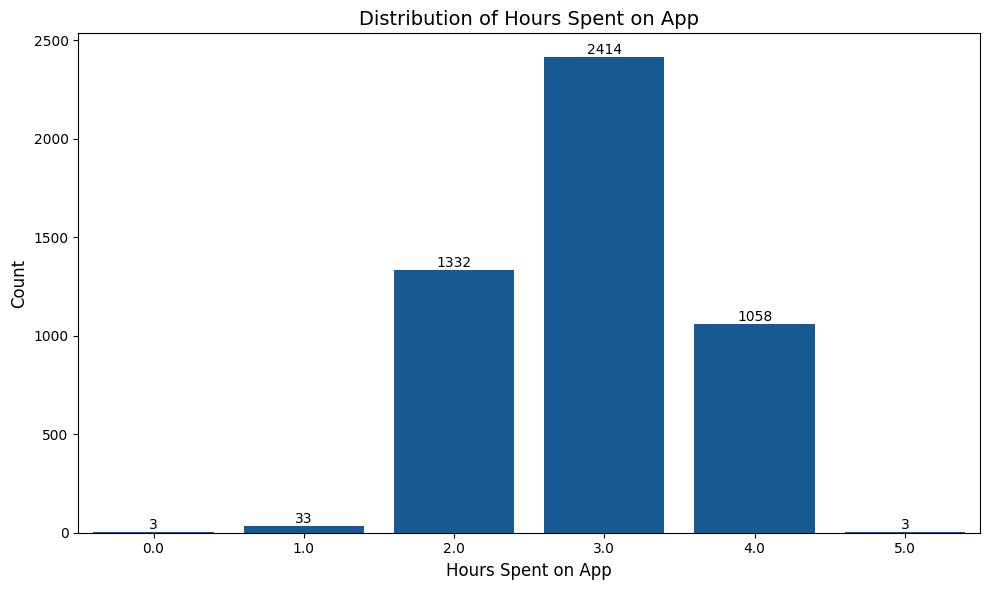

In [90]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the barplot for 'HourSpendOnApp'
ax = sns.countplot(x='HourSpendOnApp', data=df_new, color='#035AA6FF')

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points',
                fontsize=10)

# Set the labels and title
plt.xlabel('Hours Spent on App', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Hours Spent on App', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

`Key Highlight:`
- 3-Hour Engagement: Users spending 3 hours on the app make up the largest group, followed by 2-hour and 4-hour engagement levels. This indicates a key segment of users who are highly engaged for extended periods.
- Engagement Opportunities: The 3-hour segment could represent users who are either actively browsing or potentially undecided about making a purchase, making them prime candidates for targeted interactions.

`Action Plan:`
- Push Notifications for High Engagement: Implement targeted push notifications to users who have spent 3 hours on the app. These could include personalized offers, reminders about items in their cart, or limited-time discounts to encourage purchases.
- A/B Testing: Run A/B tests to assess the impact of these notifications on conversion rates and user retention for this segment.
- Target Multi-Hour Sessions: Focus on users spending 2 and 4 hours as well, possibly tailoring the message depending on their browsing or purchasing behavior, such as offering rewards for continuing their session or completing a transaction.

#### 3.5.3 Distribution of User Engagement on Marketing Initiative

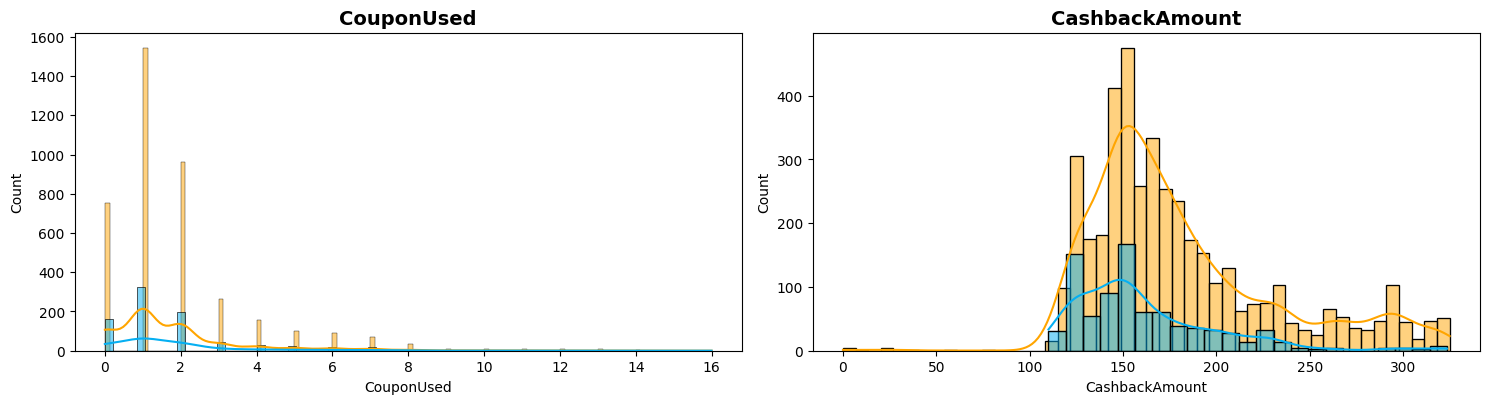

In [91]:
data_ = ["CouponUsed", "CashbackAmount"]
a=1
sns.color_palette('pastel')
plt.figure(figsize=(15,15))

a=1
for i in data_:
    plt.subplot(4,2,a)
    sns.histplot(x=df_new[df_new["Churn"]==0][i],kde=True,color='#FFA500')
    sns.histplot(x=df_new[df_new["Churn"]==1][i],kde=True,color='#05AFF2FF')
    plt.tight_layout()
    a+=1
    plt.title(f"{i}", fontsize=14, weight='bold')

plt.show()

``Key Highlight:``

- **CouponUsed:** <br>
Customers who churn often don’t use coupons or only use them a few times, in contrast to non-churning customers who use coupons more frequently (up to 8 times). This suggests a pattern where churned customers tend to use fewer coupons and may make only 1-2 orders before leaving. 
- **CashbackAmount:** <br>
Both churned and non-churned customers show similar cashback distribution, peaking around 150-170. However, non-churning customers utilize higher cashback amounts (>250) compared to those who churn. This suggests that non-churning customers might make larger purchases in a single order or are more engaged and active with the e-commerce service.

``Action Plan:``

- **Targeted Coupon Strategies:** <br>
Based on the insights, immediately implement a new coupon strategy. Provide higher value coupons or multiple coupons not only for initial orders but also for subsequent purchases to boost ongoing engagement and reduce churn. For instance, since non-churning customers typically place more than two orders and used more than 2 coupons, offer a special discount coupon for the third purchase and additional coupons for further orders within a specified timeframe.
- **Promote Higher Cashback Utilization:** <br>
Since non-churning customers utilize higher cashback amounts, develop strategies to encourage churned customers to engage with higher cashback offers. This might involve targeted promotions or personalized recommendations aimed at driving higher-value purchases and increasing engagement. Note that this program should be aligned with minimum order sizes and managed with appropriate budget allocation to ensure cost-effectiveness.

#### 3.5.4 Distribution of User Engagement by Complain

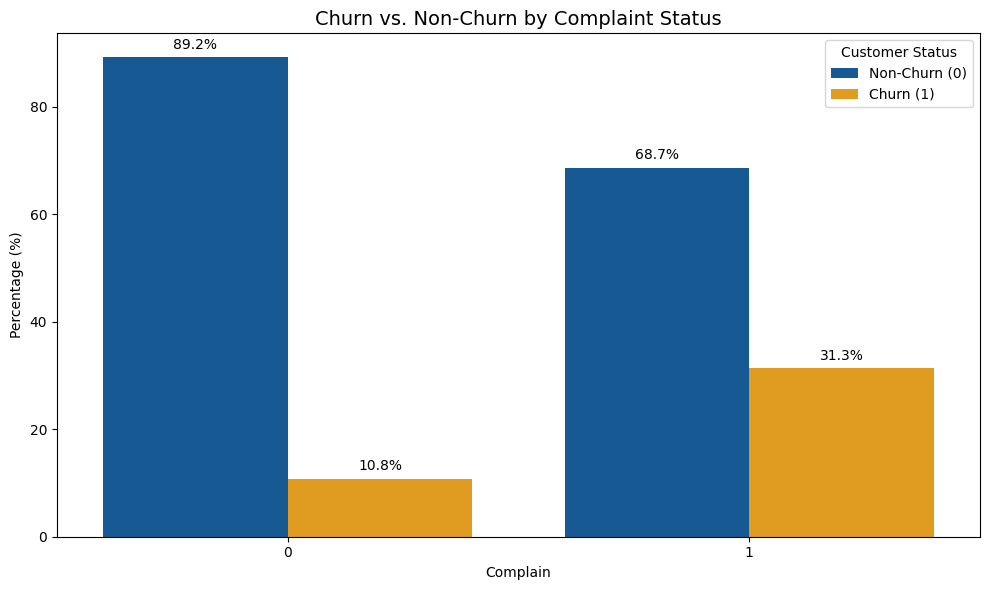

In [92]:
# Group by Complain and Churn, then calculate count
complain_churn = df_new.groupby(['Complain', 'Churn']).size().reset_index(name='count')

# Calculate the percentage of churn and non-churn per complaint status
complain_churn['percentage'] = complain_churn.groupby('Complain')['count'].transform(lambda x: x / x.sum() * 100)

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Complain', 
    y='percentage', 
    hue='Churn', 
    data=complain_churn, 
    palette={0: '#035AA6FF', 1: '#FFA500'}
)

# Add title and axis labels
plt.title('Churn vs. Non-Churn by Complaint Status', fontsize=14)
plt.xlabel('Complain')
plt.ylabel('Percentage (%)')

# Add legend with appropriate title and labels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, title='Customer Status', labels=['Non-Churn (0)', 'Churn (1)'])

# Add percentage labels on top of each bar (conditionally if height > 0)
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate bars with height greater than 0
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9),  # Offset label above the bar
                    textcoords='offset points')

# Adjust layout to prevent label clipping
plt.tight_layout()

# Show the chart
plt.show()

`Key Highlight`
As hypothesized, customers who have submitted complaints contribute to 31.31% of churn, which is 20% higher than those who have not complained. Complaints often indicate a mismatch between customer expectations and their actual experience with the service.

`Action Plan`
Focus on effectively addressing customer complaints to maintain relationships and improve retention. Implementing the "Service Recovery Paradox," where customers who experience and resolve issues may become more satisfied than those who never face problems, can be beneficial. Thus, the company should utilize customer complaints to enhance satisfaction, boost retention, and reduce churn [[2]](https://www.researchgate.net/publication/235298253_The_service_recovery_paradox_Justifiable_theory_or_smoldering_myth).

### 3.6 Customer Churn Analysis by Other Variable

#### 3.6.1 Churn vs. Non Churn by WarehouseToHome Variable

WarehouseToHome, which measures the distance from the warehouse to the customer's home (in km) is crucial for understanding how delivery logistics impact customer retention. Longer distances may lead to slower deliveries, impacting customer satisfaction. Identifying where churn is higher for distant customers helps businesses optimize delivery and improve customer experience, reducing churn overall.

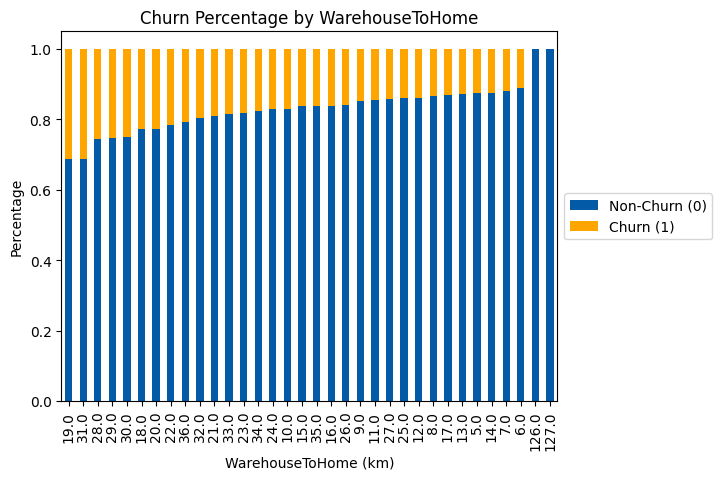

In [93]:
# Create crosstab
crosstab = pd.crosstab(df_new['WarehouseToHome'], df_new['Churn'], normalize='index').sort_values(by=1, ascending=False).style.format('{:.2%}')
crosstab_df = crosstab.data
color = ['#035AA6FF', '#FFA500']

# Create a stacked bar chart
crosstab_df.plot(kind='bar', stacked=True, color=color)
plt.title('Churn Percentage by WarehouseToHome')
plt.xlabel('WarehouseToHome (km)')
plt.ylabel('Percentage')
plt.legend(['Non-Churn (0)', 'Churn (1)'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

`Key Highlight:`

- Distance from Warehouse: 
    The chart highlights that customer churn increases as the distance from the warehouse to the home of the customer increases. In contrast, non-churning customers are more prominent in closer distances. The churn rate seems to stabilize at a higher percentage once the distance exceeds around 20 km, suggesting a potential issue with customers who live farther away.
    
- Impact on Delivery Speed:
    The increasing churn rate with distance suggests that longer delivery times or logistical challenges may be affecting customer satisfaction for those farther from the warehouse. Customers within a 1-20 km range have a noticeably lower churn rate, indicating they might experience faster or more reliable delivery compared to customers living more than 20 km away, where churn is more frequent.

`Action Plan:`
- Optimize Delivery Experience for Remote Customers:
Provide express shipping or delivery discounts for customers beyond 20 km. This can address long delivery times and improve satisfaction, ultimately reducing churn.

- Improve Communication and Transparency:
Use real-time tracking and regular updates to keep customers informed about their orders. Transparent communication can help manage expectations and reduce dissatisfaction.

- Cluster Warehouses Based on Customer Density: 
Consider opening new warehouses in high-demand areas over 20 km from existing locations. This can improve delivery times and decrease churn for customers living farther away.

## 4 Modeling

### 4.1 Data Preprocessing & Feature Engineering

#### 4.1.1 Pipeline Setup for Numerical Feature Preprocessing

In [18]:
# Define a list of numerical features to be transformed
num_feat = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 
            'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Create a transformation pipeline for numerical features
# - 'imputer': Handles missing values using KNNImputer
# - 'scaling': Scales the numerical features using RobustScaler to reduce the influence of outliers
num_transformer = ImbPipeline(steps=[
    ('imputer', KNNImputer()),     # Fill missing values using KNN imputation
    ('scaling', RobustScaler())    # Scale data using RobustScaler
])

This code sets up a preprocessing pipeline for numerical features in the dataset:

- Features Included: ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'].

- Pipeline Steps:
    - Imputation: KNNImputer() is used to fill missing values based on the mean values of their nearest neighbors.
    - Scaling: RobustScaler() scales features using statistics that are robust to outliers, which is beneficial for handling features with potential extreme values.

This pipeline ensures that numerical data is imputed and scaled consistently before being used in further modeling steps.

In [19]:
# Define numerical features
num_feat = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 
            'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
            'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Create the transformation pipeline
num_transformer = ImbPipeline(steps=[
    ('imputer', KNNImputer()),
    ('scaling', RobustScaler())
])

# Display sample data before imputation
print("Sample Data Before Imputation and Scaling:")
print(df_new[num_feat].head())

# Fit the transformer on the data and transform it
transformed_data = num_transformer.fit_transform(df_new[num_feat])

# Create a DataFrame from the transformed data for easier visualization
transformed_df = pd.DataFrame(transformed_data, columns=num_feat)

# Display sample data after imputation
print("\nSample Data After Imputation and Scaling:")
print(transformed_df.head())

Sample Data Before Imputation and Scaling:
   Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0     4.0              6.0             3.0                         3   
1     NaN              8.0             3.0                         4   
2     NaN             30.0             2.0                         4   
3     0.0             15.0             2.0                         4   
4     0.0             12.0             NaN                         3   

   NumberOfAddress  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0                9                         11.0         1.0         1.0   
1                7                         15.0         0.0         1.0   
2                6                         14.0         0.0         1.0   
3                8                         23.0         0.0         1.0   
4                3                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.

#### 4.1.2 Pipeline Setup for Categorical Feature Preprocessing

In [20]:
# Define the categorical features for transformation
# OneHot_feature: List of features that will be encoded using OneHotEncoding
OneHot_feature = ['PreferredLoginDevice', 'Gender', 'MaritalStatus', 'Complain']

# Binary_feature: List of features that will be encoded using BinaryEncoding
Binary_feature = ['PreferredPaymentMode', 'PreferedOrderCat']

# Ordinal_feature: List of features that will be encoded using OrdinalEncoding
Ordinal_feature = ['CityTier', 'SatisfactionScore']

# Create a transformation pipeline for the one-hot encoded features
# - 'imputer': Fills missing values using the most frequent value
# - 'encoding': Applies OneHotEncoder, dropping the first category to avoid multicollinearity
onehot_transformer = ImbPipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),     # Fill missing values with the most frequent value
    ('encoding', OneHotEncoder(handle_unknown='ignore', drop='first'))  # One-hot encode, ignoring unknown categories
])

# Create a transformation pipeline for binary encoded features
# - 'imputer': Fills missing values using the most frequent value
# - 'encoding': Applies BinaryEncoder to encode categorical variables into binary format
binary_transformer = ImbPipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),     # Fill missing values with the most frequent value
    ('encoding', ce.BinaryEncoder())   # Apply binary encoding to the categorical features
])

# Create a transformation pipeline for ordinal encoded features
# - 'imputer': Fills missing values using the most frequent value
# - 'encoding': Applies OrdinalEncoder to encode ordinal variables automatically
ordinal_transformer = ImbPipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),     # Fill missing values with the most frequent value
    ('encoding', OrdinalEncoder())  # Ordinal encoding
])

# Combine all transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('onehot', onehot_transformer, OneHot_feature),
    ('binary', binary_transformer, Binary_feature),
    ('ordinal', ordinal_transformer, Ordinal_feature)
])


In [22]:
# Combine all categorical features into a single list
categorical_features = OneHot_feature + Binary_feature + Ordinal_feature

# Display sample data before applying any transformations
print("Sample Data Before Transformation:")
print(df_new[categorical_features].head())

# Apply the transformation pipeline to the categorical features
transformed_data = preprocessor.fit_transform(df_new)

# Use the correct method to get the transformed column names
transformed_columns = preprocessor.get_feature_names_out()

# Convert the transformed data into a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=transformed_columns)

# Display sample data after applying transformations
print("\nSample Data After Transformation:")
print(transformed_df.head())


Sample Data Before Transformation:
  PreferredLoginDevice  Gender MaritalStatus  Complain PreferredPaymentMode  \
0         Mobile Phone  Female        Single         1           Debit Card   
1         Mobile Phone    Male        Single         1                  UPI   
2         Mobile Phone    Male        Single         1           Debit Card   
3         Mobile Phone    Male        Single         0           Debit Card   
4         Mobile Phone    Male        Single         0          Credit Card   

     PreferedOrderCat  CityTier  SatisfactionScore  
0  Laptop & Accessory         3                  2  
1        Mobile Phone         1                  3  
2        Mobile Phone         1                  3  
3  Laptop & Accessory         3                  5  
4        Mobile Phone         1                  5  

Sample Data After Transformation:
   onehot__PreferredLoginDevice_Mobile Phone  onehot__Gender_Male  \
0                                        1.0                  0.0   

In [23]:
# Bundling To Columnformer As Preprocessing
prepros = ColumnTransformer(transformers=[
    ('num', num_transformer, num_feat),
    ('onehot', onehot_transformer, OneHot_feature),
    ('binary', binary_transformer, Binary_feature),
    ('ordinal', ordinal_transformer, Ordinal_feature)
], remainder='passthrough')

prepros

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaling', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
                                  'NumberOfDeviceRegistered', 'NumberOfAddress',
                                  'OrderAmountHikeFromlastYear', 'CouponUsed',
                                  'OrderCount', 'DaySinceLastOrder',
                                  'CashbackAmount']),
                                ('onehot',
                                 Pipeline(steps=[('impu...
                                 ['PreferredLoginDevice', 'Gender',
                                  'MaritalStatus', 'Complain']),
                                ('binary',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  BinaryEncoder())]),
                                 ['PreferredPaymentMode', 'PreferedOrderCat']),
                                ('ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OrdinalEncoder())]),
                                 ['CityTier', 'SatisfactionScore'])])

The code is designed to preprocess categorical features in a dataset by applying appropriate transformations. It uses the Pipeline class from sklearn.pipeline and category_encoders for this purpose.

- Feature Lists:
    - onehot_features: Columns that will be encoded using One-Hot Encoding.
    - binary_features: Columns that will be encoded using Binary Encoding.
    - ordinal_features: Columns that will be encoded using Ordinal Encoding.

- Transformers:
    - One-Hot Encoding Transformer (onehot_transformer):
        - Imputes missing values using the most frequent value in each column.
        - Applies One-Hot Encoding to convert categorical features into binary columns.
    - Binary Encoding Transformer (binary_transformer):
        - Imputes missing values using the most frequent value in each column.
        - Applies Binary Encoding to convert categorical features into a compact binary format, which reduces dimensionality compared to One-Hot Encoding.
    - Ordinal Encoding Transformer (binary_transformer):
        - Imputes missing values using the most frequent value in each column.
        - Applies Ordinal Encoding, which assigns numerical values to categories based on their order (if applicable), converting categorical features into numeric ordinal values.

- Column Transformer (prepros):
    - Bundles the transformers into a ColumnTransformer.
    - Applies the onehot_transformer to columns specified in onehot_features.
    - Applies the binary_transformer to columns specified in binary_features.
    - Applies the ordinal_transformer to columns specified in ordinal_features.
    - Leaves other columns untouched (remainder='passthrough').

This setup prepares the categorical features for further analysis or modeling by ensuring they are properly encoded and missing values are handled.

In [24]:
# Separate the features (independent variables) into 'x' and the target variable 'Churn' into 'y'
x = df_new.drop('Churn', axis=1)  # Features without the 'Churn' column
y = df_new['Churn']  # Target column 'Churn'

The code splits the dataset df_new into two parts: x, which contains all the features except the target column 'Churn', and y, which contains only the target column 'Churn' for further analysis or modeling.

In [25]:
# Ensure all features are present in the DataFrame
missing_features = [feature for feature in num_feat + OneHot_feature + Binary_feature + Ordinal_feature if feature not in x.columns]
if missing_features:
    print(f"Warning: The following features are not in the DataFrame: {missing_features}")

In [26]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5623    0
5624    0
5626    0
5627    0
5629    0
Name: Churn, Length: 5073, dtype: int64

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2024)

The code splits the dataset into training (80%) and testing (20%) sets while preserving the class distribution of the target variable 'y' using stratification. It also ensures reproducibility by setting a random_state of 2024.

### 4.2 Modeling & Evaluation

In [28]:
# Define models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(class_weight='balanced')
logreg = LogisticRegression(class_weight='balanced')
rf = RandomForestClassifier(n_estimators=20, max_features=4, max_depth=3, random_state=42, class_weight='balanced')

soft = VotingClassifier(estimators=[
    ('knn', knn),
    ('DT', dt),
    ('LogisticReg', logreg),
    ('RF',rf)
], voting='soft')

hard = VotingClassifier(estimators=[
    ('knn', knn),
    ('DT', dt),
    ('LogisticReg', logreg),
    ('RF',rf)
], voting='hard')

stck_knn = StackingClassifier([
    ('knn', knn),
    ('DT', dt),
    ('LogisticReg', logreg)
], final_estimator=KNeighborsClassifier())

stck_dt = StackingClassifier([
    ('knn', knn),
    ('DT', dt),
    ('LogisticReg', logreg)
], final_estimator=DecisionTreeClassifier(class_weight='balanced'))

stck_logreg = StackingClassifier([
    ('knn', knn),
    ('DT', dt),
    ('LogisticReg', logreg)
], final_estimator=LogisticRegression(class_weight='balanced'))

stck_rf = StackingClassifier([
    ('knn', knn),
    ('DT', dt),
    ('LogisticReg', logreg)
], final_estimator=RandomForestClassifier(class_weight='balanced'))

bagging_knn = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=250)
bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), n_estimators=250)
bagging_logreg = BaggingClassifier(estimator=LogisticRegression(class_weight='balanced'), n_estimators=250)

adaboost = AdaBoostClassifier(n_estimators=300)
gb = GradientBoostingClassifier(n_estimators=300)
xgboost = XGBClassifier(n_estimators=300)
lgbm = lgb.LGBMClassifier(n_estimators=300) 

models = [knn, dt, logreg, rf, soft, hard, stck_knn, stck_dt, stck_logreg, stck_rf, bagging_knn, bagging_dt, bagging_logreg, adaboost, gb, xgboost, lgbm]
model_names = ['KNN', 'Decision Tree', 'LogReg','Random Forest', 'Soft Voting', 'Hard Voting', 'Stacking - KNN', 'Stacking - DT', 'Stacking - LogReg', 'Stacking - RF',
               'Bagging - KNN','Bagging - DT', 'Bagging - LogReg', 'AdaBoost', 'GradientBoosting', 'XGBoosting' ,'LGBM']

### 4.3 Model Benchmarking

In [30]:
# Custom scorer for F2 score (beta=2 leans more towards recall)
f2_scorer = make_scorer(fbeta_score, beta=2)

score = []
rata = []
std = []

for i in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = ImbPipeline([
        ('preprocess', prepros),
        ('model', i)
    ])
    # Change scoring to F2 score
    model_cv = cross_val_score(estimator, x_train, y_train, cv=skfold, scoring=f2_scorer)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
# Create DataFrame to store mean recall and standard deviation
pd.DataFrame({'model': model_names, 'mean F2 score': rata, 'sdev': std}).set_index('model').sort_values(by='mean F2 score', ascending=False)

[LightGBM] [Info] Number of positive: 538, number of negative: 2708
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 3246, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.165742 -> initscore=-1.616107
[LightGBM] [Info] Start training from score -1.616107
[LightGBM] [Info] Number of positive: 538, number of negative: 2708
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 3246, number of used features: 23
[LightGBM] [Info] [binary:Bo

,mean F2 score,sdev
model,,
Stacking - LogReg,0.839959,0.023788
LGBM,0.835246,0.013756
XGBoosting,0.832202,0.018763
Bagging - DT,0.796514,0.022627
Decision Tree,0.788123,0.039148
Stacking - KNN,0.772293,0.031822
Soft Voting,0.771628,0.046507
Stacking - RF,0.725969,0.021419
Stacking - DT,0.723695,0.025899


Summary
- Top Performers: Stacking - LogReg, LGBM, and XGBoosting exhibited the highest F2-scores, with Stacking - LogReg being the best performer.
- Mid-Range Performers: Models like Bagging - DT, Decision Tree, and Stacking - KNN delivered good performance but fell short compared to the top performers.
- Lower Performers: Models like Stacking - RF, Hard Voting, AdaBoost, and KNN-based models showed lower performance, with KNN performing the worst.

### 4.4 Resampling Methods

In [31]:
# List down oversampling dan undersampling method

# Over-sampling techniques
ros = RandomOverSampler(random_state=2024)  # Random Over Sampler with default parameters
adasyn = ADASYN(random_state=2024)  # ADASYN with default parameters
smote = SMOTE(random_state=2024)  # SMOTE with default parameters
bsmote = BorderlineSMOTE(random_state=2024)  # Borderline SMOTE with default parameters
svm = SVMSMOTE(random_state=2024)  # SVM-based SMOTE with default parameters

# Under-sampling techniques
rus = RandomUnderSampler(random_state=2024)  # Random Under Sampler with default parameters
nm = NearMiss()  # Near Miss under-sampler with default parameters
cnn = CondensedNearestNeighbour(n_neighbors=3, random_state=2024)  # Condensed Nearest Neighbour with default n_neighbors=3
cc = ClusterCentroids(random_state=2024)  # Cluster Centroids with default parameters
tl = TomekLinks()  # Tomek Links with default parameters
enn = EditedNearestNeighbours()  # Edited Nearest Neighbours with default parameters

resampling = [ros, adasyn, smote, bsmote, svm, rus, nm, cnn, cc, tl, enn]
resampling_names = ['Random Over Sampler', 'ADASYN', 'SMOTE', 'Borderline SMOTE', 'SVM SMOTE', 'Random Under Sampler', 
                    'Near Miss', 'Condensed Nearest Neighbour', 'Cluster Centroids', 'Tomek Links', 'Edited Nearest Neighbors']

In [33]:
# Initialize lists to store evaluation results
results = []

for model, model_name in zip(models, model_names):
    # Loop over each resampling method
    for resampler, resampler_name in zip(resampling, resampling_names):
        # Create pipeline with preprocessing, resampling, and model
        pipe_model = ImbPipeline([
            ('PrePros', prepros),
            ('Resamp', resampler),
            ('Model', model)
        ])

        # Train the model
        pipe_model.fit(x_train, y_train)

        # Make predictions
        y_pred = pipe_model.predict(x_test)

        # Evaluate metrics, including F2 score for recall emphasis
        acc = round(accuracy_score(y_test, y_pred) * 100, 2)
        pres = round(precision_score(y_test, y_pred) * 100, 2)
        recall = round(recall_score(y_test, y_pred) * 100, 2)
        f2 = round(fbeta_score(y_test, y_pred, beta=2) * 100, 2)  # F2 score

        # Append results to the list
        results.append({
            'Model': model_name,
            'Metode Resampling': resampler_name,
            'Accuracy': acc,
            'Precision': pres,
            'Recall': recall,
            'F2 Score': f2  # Store F2 score instead of F1
        })

# Convert results list to DataFrame and sort by F2 Score
pd.DataFrame(results).sort_values(by='F2 Score', ascending=False)

[LightGBM] [Info] Number of positive: 3385, number of negative: 3385
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 6770, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3438, number of negative: 3385
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5285
[LightGBM] [Info] Number of data points in the train set: 6823, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503884 -> initscore=0.015536
[LightGBM] [Info] Start training from score 0.015536
[LightGBM] [Info] Number of positive: 3385, number of negative: 3385
[LightG

,Model,Metode Resampling,Accuracy,Precision,Recall,F2 Score
165,XGBoosting,Random Over Sampler,97.54,92.81,92.26,92.37
176,LGBM,Random Over Sampler,97.34,92.22,91.67,91.78
180,LGBM,SVM SMOTE,97.44,93.29,91.07,91.51
168,XGBoosting,Borderline SMOTE,97.24,92.17,91.07,91.29
185,LGBM,Tomek Links,97.24,92.17,91.07,91.29
...,...,...,...,...,...,...
9,KNN,Tomek Links,89.36,77.78,50.00,53.85
39,Random Forest,Near Miss,59.70,25.15,72.62,52.72
119,Bagging - KNN,Tomek Links,89.56,81.00,48.21,52.46
116,Bagging - KNN,Near Miss,68.47,29.23,63.69,51.54


Top-performing models: XGBoost and LGBM consistently showed strong performance across different resampling methods.
- XGBoost with Random Over Sampler achieved an F2 score of 92.37%, with an accuracy of 97.54%, precision of 92.81%, and recall of 92.26%.
- LGBM with Random Over Sampler performed similarly, achieving an F2 score of 91.78%, accuracy of 97.34%, precision of 92.22%, and recall of 91.67%.
- LGBM with SVM SMOTE also performed well, with an F2 score of 91.51%, accuracy of 97.44%, precision of 93.29%, and recall of 91.07%.
- XGBoost with Borderline SMOTE and LGBM with Tomek Links had slightly lower F2 scores at 91.29%, but still showed solid accuracy and recall rates.

Lower-performing models: KNN and Bagging-KNN had significantly lower performance, especially with under-sampling methods like Near Miss and Tomek Links.
- KNN with Tomek Links resulted in an F2 score of 53.85%, while Bagging-KNN with Tomek Links scored 52.97%.
- Near Miss further impacted performance, with KNN scoring 51.53% and Bagging-KNN 52.07%, indicating weaker recall and precision.

Overall, Random Over Sampler consistently improved performance for both XGBoost and LGBM, making them the best options for recall-focused metrics like the F2 score.

### 4.5 Hyperparameter Tuning

In [34]:
# Defining the pipeline

xgboost_ros_pipe = ImbPipeline(steps=[
    ('PrePros', prepros),
    ('Resamp', ros),
    ('Model', xgboost)
])

lgbm_ros_pipe = ImbPipeline(steps=[
    ('PrePros', prepros),
    ('Resamp', ros),
    ('Model', lgbm)
])

lgbm_svm_pipe = ImbPipeline(steps=[
    ('PrePros', prepros),
    ('Resamp', svm),
    ('Model', lgbm)
])

#### 4.5.1 Hyperparameter Tuning - XGBoosting with Random Over Sampler

In [35]:
# Define F2 score as the scoring metric
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define parameter grid for XGBoost with Random Oversampling (ROS)
xgboost_ros_param = {
    'Model__n_estimators': [100, 200, 300],  # Number of boosting rounds
    'Model__learning_rate': [0.01, 0.05, 0.1],  # Learning rate (eta) for controlling the contribution of trees
    'Model__max_depth': [3, 5, 7],  # Maximum depth of trees
    'Model__subsample': [0.7, 0.9, 1.0],  # Fraction of samples used per boosting round
    'Model__colsample_bytree': [0.7, 0.8, 1.0],  # Fraction of features used in each tree
    'Model__gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'Model__min_child_weight': [1, 5, 10],  # Minimum sum of instance weight (hessian) needed in a child
    'Model__scale_pos_weight': [1, 2, 5]  # Scaling the positive class to handle imbalance
}

# Perform RandomizedSearchCV for hyperparameter tuning with XGBoost + Random Oversampling (ROS)
xgboost_ros_random = RandomizedSearchCV(
    estimator=xgboost_ros_pipe, 
    param_distributions=xgboost_ros_param, 
    n_iter=500,  # Number of random combinations to try
    cv=StratifiedKFold(n_splits=5), 
    scoring=f2_scorer, 
    n_jobs=-1,
    random_state=2024  # For reproducibility
)
xgboost_ros_random.fit(x_train, y_train)

# Best parameters and best score
best_params_xgboost_ros = xgboost_ros_random.best_params_
best_score_xgboost_ros = xgboost_ros_random.best_score_

print("Best Parameters (ROS - XGBoost):", best_params_xgboost_ros)
print("Best Score (ROS - XGBoost, F2):", best_score_xgboost_ros)

# Evaluate the model with the best found parameters
y_pred_xgboost_ros = xgboost_ros_random.best_estimator_.predict(x_test)
acc_xgboost_ros = accuracy_score(y_test, y_pred_xgboost_ros)
pres_xgboost_ros = precision_score(y_test, y_pred_xgboost_ros)
recall_xgboost_ros = recall_score(y_test, y_pred_xgboost_ros)
f1_xgboost_ros = f1_score(y_test, y_pred_xgboost_ros)
f2_xgboost_ros = fbeta_score(y_test, y_pred_xgboost_ros, beta=2)

# Output the evaluation results
print(f"Accuracy (ROS - XGBoost): {acc_xgboost_ros * 100:.3f}%")
print(f"Precision (ROS - XGBoost): {pres_xgboost_ros * 100:.3f}%")
print(f"Recall (ROS - XGBoost): {recall_xgboost_ros * 100:.3f}%")
print(f"F1 Score (ROS - XGBoost): {f1_xgboost_ros * 100:.3f}%")
print(f"F2 Score (ROS - XGBoost): {f2_xgboost_ros * 100:.3f}%")

Best Parameters (ROS - XGBoost): {'Model__subsample': 1.0, 'Model__scale_pos_weight': 5, 'Model__n_estimators': 300, 'Model__min_child_weight': 1, 'Model__max_depth': 7, 'Model__learning_rate': 0.1, 'Model__gamma': 0.2, 'Model__colsample_bytree': 0.8}
Best Score (ROS - XGBoost, F2): 0.8891783026040108
Accuracy (ROS - XGBoost): 96.453%
Precision (ROS - XGBoost): 86.667%
Recall (ROS - XGBoost): 92.857%
F1 Score (ROS - XGBoost): 89.655%
F2 Score (ROS - XGBoost): 91.549%


Summary:
- The XGBoost with ROS model achieves excellent recall (92.86%), ensuring the model detects almost all churners. This makes it highly effective at minimizing false negatives, which is critical for churn prediction.
- The model also maintains strong accuracy at 96.45%, meaning it correctly classifies the vast majority of instances, both churners and non-churners.
- The precision (86.67%) is slightly lower, indicating that there are some false positives, where non-churners are mistakenly classified as churners.
- The F1 Score (89.66%) shows a balanced performance between precision and recall.
- The F2 Score (91.55%) confirms that the model prioritizes recall, which is essential in churn scenarios where missing a churner is more costly than incorrectly identifying a non-churner.

#### 4.5.2 Hyperparameter Tuning - LGBM with Random Over Sampler

In [36]:
# Define F2 score as the scoring metric
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define parameter grid for LightGBM with Random Oversampling (ROS)
lgbm_ros_random_param = {
    'Model__n_estimators': [100, 200, 300],  # Number of boosting stages
    'Model__learning_rate': [0.01, 0.05, 0.1],  # Learning rate for LightGBM
    'Model__max_depth': [-1, 3, 5],  # Maximum depth for the trees
    'Model__subsample': [0.7, 0.9, 1.0],  # Subsample to prevent overfitting with oversampled data
    'Model__num_leaves': [20, 31, 50],  # Number of leaves in one tree
    'Model__min_child_samples': [10, 20, 30],  # Minimum number of samples a leaf must have
    'Model__colsample_bytree': [0.8, 1.0]  # Fraction of features used per tree-building iteration
}

# Perform RandomizedSearchCV for hyperparameter tuning with LightGBM + Random Oversampling (ROS)
lgbm_ros_random = RandomizedSearchCV(estimator=lgbm_ros_pipe, param_distributions=lgbm_ros_random_param, n_iter=500,
                                     cv=StratifiedKFold(n_splits=5), scoring=f2_scorer, n_jobs=-1, random_state=2024)

# Fit the RandomizedSearchCV model
lgbm_ros_random.fit(x_train, y_train)

# Best parameters and best score
best_params_random_ros = lgbm_ros_random.best_params_
best_score_random_ros = lgbm_ros_random.best_score_

# Output the best parameters and score
print("Best Parameters (Random Search ROS - LightGBM):", best_params_random_ros)
print("Best Score (Random Search ROS - LightGBM, F2):", best_score_random_ros)

# Evaluate the model with the best found parameters
y_pred_random_ros = lgbm_ros_random.best_estimator_.predict(x_test)
acc_random_ros = accuracy_score(y_test, y_pred_random_ros)
pres_random_ros = precision_score(y_test, y_pred_random_ros)
recall_random_ros = recall_score(y_test, y_pred_random_ros)
f1_random_ros = f1_score(y_test, y_pred_random_ros)
f2_random_ros = fbeta_score(y_test, y_pred_random_ros, beta=2)

# Output the evaluation result
print(f"Accuracy (Random Search ROS - LightGBM): {acc_random_ros * 100:.3f}%")
print(f"Precision (Random Search ROS - LightGBM): {pres_random_ros * 100:.3f}%")
print(f"Recall (Random Search ROS - LightGBM): {recall_random_ros * 100:.3f}%")
print(f"F1 Score (Random Search ROS - LightGBM): {f1_random_ros * 100:.3f}%")
print(f"F2 Score (Random Search ROS - LightGBM): {f2_random_ros * 100:.3f}%")

[LightGBM] [Info] Number of positive: 3385, number of negative: 3385
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 6770, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters (Random Search ROS - LightGBM): {'Model__subsample': 0.7, 'Model__num_leaves': 31, 'Model__n_estimators': 300, 'Model__min_child_samples': 10, 'Model__max_depth': -1, 'Model__learning_rate': 0.05, 'Model__colsample_bytree': 0.8}
Best Score (Random Search ROS - LightGBM, F2): 0.8751788126555523
Accuracy (Random Search ROS - LightGBM): 96.749%
Precision (Random Search ROS - LightGBM): 89.017%
Recall (Random Search ROS - LightGBM): 91.667%
F1 Score (Random Search ROS - LightGBM): 90.

Summary:
- The LightGBM with ROS model delivers excellent overall performance, with high recall (91.67%) and precision (89.02%). This balance ensures that the model effectively identifies churners while maintaining a relatively low number of false positives.
- The model’s accuracy is strong at 96.75%, confirming that the majority of predictions—both for churners and non-churners—are correct.
- The F1 Score (90.32%) indicates a well-balanced performance between precision and recall.
- The F2 Score (91.12%) emphasizes the model's focus on recall, which is crucial for reducing false negatives in churn prediction.

#### 4.5.3 Hyperparameter Tuning - LGBM with SVMSMOTE

In [37]:
# Define F2 score as the scoring metric
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define parameter grid for LightGBM with SVMSMOTE
lgbm_svm_param = {
    'Model__n_estimators': [100, 200, 300],  # Number of boosting stages
    'Model__learning_rate': [0.01, 0.05, 0.1],  # Learning rate for LightGBM
    'Model__max_depth': [-1, 5, 7],  # Maximum depth for the trees
    'Model__subsample': [0.7, 0.9, 1.0],  # Subsample to prevent overfitting
    'Model__num_leaves': [20, 31, 50],  # Number of leaves in one tree
    'Model__min_child_samples': [10, 20, 50],  # Minimum number of samples per leaf
    'Model__min_split_gain': [0.0, 0.1, 0.2],  # Minimum gain to make a split
    'Model__reg_alpha': [0.0, 0.1, 0.5],  # L1 regularization
    'Model__reg_lambda': [0.0, 0.1, 0.5]  # L2 regularization
}

# Perform RandomizedSearchCV for hyperparameter tuning with LightGBM + SVMSMOTE
lgbm_svm_random = RandomizedSearchCV(
    estimator=lgbm_svm_pipe, 
    param_distributions=lgbm_svm_param, 
    n_iter=500,  # Number of random combinations to try
    cv=StratifiedKFold(n_splits=5), 
    scoring=f2_scorer, 
    n_jobs=-1,
    random_state=42  # For reproducibility
)
lgbm_svm_random.fit(x_train, y_train)

# Best parameters and best score
best_params_svm = lgbm_svm_random.best_params_
best_score_svm = lgbm_svm_random.best_score_

print("Best Parameters (SVMSMOTE - LightGBM):", best_params_svm)
print("Best Score (SVMSMOTE - LightGBM, F2):", best_score_svm)

# Evaluate the model with the best found parameters
y_pred_svm = lgbm_svm_random.best_estimator_.predict(x_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
pres_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
f2_svm = fbeta_score(y_test, y_pred_svm, beta=2)

# Output the evaluation results
print(f"Accuracy (SVMSMOTE - LightGBM): {acc_svm * 100:.3f}%")
print(f"Precision (SVMSMOTE - LightGBM): {pres_svm * 100:.3f}%")
print(f"Recall (SVMSMOTE - LightGBM): {recall_svm * 100:.3f}%")
print(f"F1 Score (SVMSMOTE - LightGBM): {f1_svm * 100:.3f}%")
print(f"F2 Score (SVMSMOTE - LightGBM): {f2_svm * 100:.3f}%")

[LightGBM] [Info] Number of positive: 3385, number of negative: 3385
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5037
[LightGBM] [Info] Number of data points in the train set: 6770, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters (SVMSMOTE - LightGBM): {'Model__subsample': 0.7, 'Model__reg_lambda': 0.1, 'Model__reg_alpha': 0.0, 'Model__num_leaves': 50, 'Model__n_estimators': 300, 'Model__min_split_gain': 0.0, 'Model__min_child_samples': 50, 'Model__max_depth': -1, 'Model__learning_rate': 0.1}
Best Score (SVMSMOTE - LightGBM, F2): 0.8641586177983168
Accuracy (SVMSMOTE - LightGBM): 97.833%
Precision (SVMSMOTE - LightGBM): 94.512%
Recall (SVMSMOTE - LightGBM): 92.262%
F1 Score (SVMSMOTE - LightGBM): 93.373%
F2 Score (SVMSMOTE - LightGBM): 92.703%


Summary:
- The LightGBM with SVMSMOTE model achieves a high recall of 92.262%, ensuring that the majority of churners are identified. This recall value is slightly higher than the previous version, demonstrating the model’s effectiveness in capturing potential churners.
- It also maintains strong overall accuracy at 97.833%, indicating that the model is highly accurate in classifying both churners and non-churners, with very few misclassifications.
- The precision, at 94.512%, reflects the model’s ability to reduce false positives, meaning fewer non-churners are mistakenly classified as churners. While slightly lower than previous iterations, this still indicates strong precision.
- The F1 score of 93.373% shows that the model strikes a good balance between precision and recall, demonstrating overall effectiveness.
- The F2 score of 92.703%, which places more emphasis on recall, confirms that the model continues to prioritize identifying churners effectively while maintaining solid precision. This makes it a balanced and reliable model for churn prediction.

Across the models tested with Random Oversampling (ROS) and SVMSMOTE, all models performed exceptionally well, with recall ranging from 91% to 93%, ensuring that the majority of churners are correctly identified. Accuracy remains consistently high, ranging from 96% to 97.8%, indicating strong overall classification performance across the models. Precision is slightly lower for XGBoost with ROS (around 87%), while LightGBM models using both ROS and SVMSMOTE achieve higher precision (up to 94%), significantly reducing the false positive rate.

The F2 Scores for the models, which emphasize recall, range between 91% and 92.7%, reflecting the models' strong focus on minimizing false negatives, which is critical in churn prediction. This highlights the models' ability to handle imbalanced data effectively, particularly when correctly identifying churners is a priority.

## 5 Conclusion on Model Performance

### 5.1 Review on Best Model Selection

In [38]:
# Define Models - After Tuning
xgboost_ros = XGBClassifier(subsample=1.0, scale_pos_weight=5, n_estimators=300, min_child_weight=1, max_depth=7, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8)
lgbm_ros = lgb.LGBMClassifier(subsample=0.7, num_leaves=31, n_estimators=300, min_child_samples=10, max_depth=-1, learning_rate=0.05, colsample_bytree=0.8)
lgbm_svm = lgb.LGBMClassifier(subsample=1.0, reg_lambda=0.0, reg_alpha=0.0, num_leaves=31, n_estimators=300, min_split_gain=0.0, min_child_samples=50, max_depth=-1, learning_rate=0.1)


# Define different resampling strategies
ros = RandomOverSampler(random_state=2024)  # ROS
smote = SMOTE(random_state=2024)  # SMOTE

# List of models and resampling methods to iterate through
models_and_resampling = [
    (xgboost_ros, ros, 'XGBoosting with ROS (After Tuning)'),
    (lgbm_ros, ros, 'LGBM with ROS (After Tuning)'),
    (lgbm_svm, svm, 'LGBM with SVMSMOTE (After Tuning)')
    
]

# Define the function to fit and predict
def y_pred_func(model, resampler):
    estimator = ImbPipeline([
        ('preprocess', prepros),
        ('resampling', resampler),
        ('model', model)
    ])
    
    estimator.fit(x_train, y_train)
    return estimator, estimator.predict(x_test), x_test

# Iterate over the models and resampling techniques
for model, resampler, description in models_and_resampling:
    estimator, y_pred, x_test = y_pred_func(model, resampler)
    
    # Print the default classification report
    print(description, '\n', classification_report(y_test, y_pred))
    
    # Calculate and print the F2 score
    f2 = fbeta_score(y_test, y_pred, beta=2)
    print(f"F2 Score (Beta=2): {f2:.3f}\n")

XGBoosting with ROS (After Tuning) 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       847
           1       0.87      0.93      0.90       168

    accuracy                           0.96      1015
   macro avg       0.93      0.95      0.94      1015
weighted avg       0.97      0.96      0.97      1015

F2 Score (Beta=2): 0.915

[LightGBM] [Info] Number of positive: 3385, number of negative: 3385
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 6770, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBM with ROS (After Tuning) 
               precision    recall  f1-score   support

           0       0.98  

Highlights:

- High Recall and Precision for Class 1 (Churners):
    - XGBoost with ROS (After Tuning) achieves 93% recall and 87% precision for class 1 (churners), indicating it is highly effective at identifying churners with relatively few false positives. This model also achieves an F2 score of 0.915, making it one of the best models for minimizing false negatives while maintaining solid precision.
    - LGBM with ROS (After Tuning) performs similarly, achieving 92% recall and 89% precision for churners. While its precision is slightly higher than XGBoost, its F2 score is 0.911, indicating strong performance in minimizing false negatives but slightly lower overall than XGBoost.
    - LGBM with SVMSMOTE (After Tuning) achieves 91% recall and 93% precision, balancing both metrics well. Its F2 score of 0.915 matches XGBoost with ROS, making it a competitive model for recall-focused performance.

- High Accuracy:
    - All models achieve high accuracy, confirming their strong overall classification performance:
        - XGBoost with ROS reaches 96% accuracy.
        - LGBM with ROS also achieves 97% accuracy.
        - LGBM with SVMSMOTE matches this performance with 97% accuracy.
    - These results demonstrate that the models consistently perform well in generalizing predictions across the dataset.

- Macro and Weighted Averages:
    - The macro average F1-scores for all models range from 0.94 to 0.95, reflecting balanced performance across both classes (churners and non-churners).
    - The weighted average F1-scores are also high, ranging from 0.96 to 0.97, indicating strong performance of the models, particularly for class 0 (non-churners).

- Class 0 (Non-churners) Performance:
    - Precision for class 0 (non-churners) is near perfect across all models, ranging from 0.98 to 0.99, demonstrating high accuracy in identifying non-churners.
    - Recall for class 0 is also very strong, ranging from 97% to 99%, indicating that very few non-churners are misclassified as churners.

- Model Comparison:
    - XGBoost with ROS (After Tuning) achieves an F2 score of 0.915, emphasizing its ability to minimize false negatives while maintaining high precision and recall for churners.
    - LGBM with ROS (After Tuning) and LGBM with SVMSMOTE (After Tuning) both perform well, with slightly lower F2 scores (0.911 and 0.915, respectively). These models are competitive but do not outperform XGBoost in balancing precision and recall.

Summary:
- All models demonstrate excellent performance in identifying both churners (class 1) and non-churners (class 0). The high recall and precision values show that the models are well-balanced and effective at minimizing misclassifications.
- XGBoost with ROS (After Tuning) stands out with its F2 score of 0.915, making it a reliable model for reducing both false positives and false negatives, especially for churn prediction scenarios where recall is critical.
- LGBM with ROS (After Tuning) and LGBM with SVMSMOTE (After Tuning) offer strong alternatives with similar precision and recall. However, their F2 scores (0.911 and 0.915, respectively) are slightly lower than XGBoost with ROS.
- All three models achieve high accuracy and strong performance, making them suitable for churn prediction, but XGBoost with ROS remains the most balanced and effective model for recall-oriented tasks.

### 5.2 Chosen Best Model

In [39]:
# Define models
xgboost_ros = XGBClassifier(subsample=1.0, scale_pos_weight=5, n_estimators=300, min_child_weight=1, max_depth=7, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8)
models = [xgboost_ros]

ros = RandomOverSampler(random_state=2024)

def y_pred_func(x_train,y_train):
    estimator=ImbPipeline([
        ('preprocess',prepros),
        ('resampling',ros),
        ('model',xgboost_ros)])
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)


estimator,y_pred,x_test = y_pred_func(x_train,y_train)
print('Classification Report XGBoost with ROS Tuned : \n','\n', classification_report(y_test,y_pred))
cm = pd.crosstab(y_test,y_pred)
print('Confusion Matrix XGBoost with ROS Tuned : \n')
cm

Classification Report XGBoost with ROS Tuned : 
 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       847
           1       0.87      0.93      0.90       168

    accuracy                           0.96      1015
   macro avg       0.93      0.95      0.94      1015
weighted avg       0.97      0.96      0.97      1015

Confusion Matrix XGBoost with ROS Tuned : 



col_0,0,1
Churn,,
0,823,24
1,12,156


**Save Model**

In [40]:
xgboost_ros = XGBClassifier(subsample=1.0, scale_pos_weight=5, n_estimators=300, min_child_weight=1, max_depth=7, learning_rate=0.1, gamma=0.2, colsample_bytree=0.8)
xgboost_ros_pipe=ImbPipeline([
        ('preprocess',prepros),
        ('resampling',ros),
        ('model',xgboost)])

xgboost_ros_pipe.fit(x_train,y_train)

import pickle

with open('lgbm_ros_pickle','wb') as r:
        pickle.dump(xgboost_ros_pipe,r)

with open('lgbm_ros_pickle','rb') as r:
        xgboost_ros_p = pickle.load(r)

y_pred = xgboost_ros_p.predict(x_test)
round(recall_score(y_test,y_pred),3)

0.923

Overall, the model is highly effective at identifying both churners and non-churners, with strong precision and recall values across both classes. This makes the LightGBM model with ROS a strong candidate for predicting churn.

### 5.3 Profit and Loss Projection

Project Objective: The goal of this project is to predict whether a customer will churn or continue using the e-commerce platform. Based on the business problem:
- The model can identify 98% of non-churn customers and 93% of churn customers (Recall).
- The model's accuracy for predicting churn is 91%, meaning 9% of churn customers are incorrectly predicted as non-churn.

**Error Types & Consequences:**
- Type 1 Error (False Positive): The company spends $50 per customer per month on promotions for non-churn customers, leading to operational loss [[3]](https://www.investopedia.com/terms/o/operating-loss.asp#:~:text=An%20operating%20loss%20occurs%20when,profit%20before%20interest%20and%20taxes)[[4]](https://sci-hub.se/https://doi.org/10.1016/j.jretconser.2017.10.007).
- Type 2 Error (False Negative): A customer churns, costing the company $250 per customer per month, 5x the promotion cost [[5]](https://www.superoffice.com/blog/reduce-customer-churn/).

**WITHOUT MACHINE LEARNING:**

Without predictive models, the e-commerce company has to promote to all customers to avoid churn, leading to excessive costs:
- Total promo cost for all customers (TN+FP+FN+TP): 1,015 x $50 = $50,750
- Targeted promo for actual churn customers (TP+FP): 168 x $250 = $42,000
- The company incurs a loss of $8,750 monthly due to promoting to loyal customers unnecessarily.

**WITH MACHINE LEARNING:**

Using a machine learning model, the company can focus its promotions on predicted churn customers, reducing costs:
- Promo cost for predicted churn (FP+TP): 180 x $50 = $9,000
- Lost customers due to false negatives (FN): 12 x $250 = $3,000
- Revenue from correctly predicted churn (TP): 156 x $250 = $39,000
Total monthly profit with Machine Learning: $39,000 - $9,000 - $3,000 = $27,000.

**Mechine Learning Impact Comparison:**
- Without ML: Loss of $8,750 per month
- With ML: Profit of $27,000 per month 

In conclusion, using Machine Learning with the XGBoost algorithm, post-tuning, results in an incremental profit of $27,000 per month.

### 5.4 Feature Importances

The code extracts and visualizes the top 10 most important features from the best_model. It retrieves feature importances from the model, creates a sorted series of the top features, and plots a horizontal bar chart to display their importance.

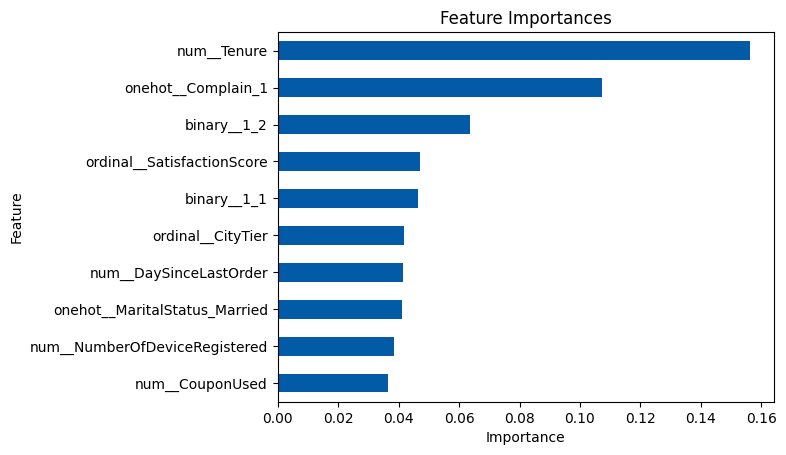

In [41]:
# Assume best_model and feature_importances are already defined
best_model = xgboost_ros_random.best_estimator_
feature_importances = best_model.named_steps['Model'].feature_importances_
feature_names = best_model.named_steps['PrePros'].get_feature_names_out()

# Create a pandas Series with feature importances and feature names
coef1 = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False).head(10)

# Plot the top 10 feature importances
coef1.plot(kind='barh', color='#035AA6FF', title='Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

In [44]:
xgboost_ros_p.named_steps.keys()

dict_keys(['preprocess', 'resampling', 'model'])

In [45]:
ohe_cols = list(xgboost_ros_p[0].transformers_[0][1].get_feature_names_out())
impute_cols = list(xgboost_ros_p[0].transformers_[1][1].get_feature_names_out())
remainder_cols = ['Complain']
cols = ohe_cols + impute_cols + remainder_cols

# Preprocessing
candidate_pre = xgboost_ros_p.named_steps['preprocess'].transform(df_new) # Data yang telah di preprocessing

model = xgboost_ros_p.named_steps['model'] # Ambil model
features = cols # Nama-nama kolom hasil preprosesing

shap_values = shap.TreeExplainer(model,
                                 data = candidate_pre,
                                #  feature_dependence="independent",
                                 feature_perturbation="interventional",
                                 model_output="probability").shap_values(candidate_pre)


 99%|===================| 5002/5073 [00:51<00:00]        

### 5.5 Potential Churn Customers

In [46]:
pred_proba = xgboost_ros_p.predict_proba(df_new)

In [47]:
df_new['Prediction(Prob->1)'] = pred_proba[:,1]
df_new.sort_values(by='Prediction(Prob->1)', ascending=False).head(10)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Prediction(Prob->1)
3147,1,1.0,Computer,3,12.0,E wallet,Male,4.0,4,Mobile Phone,4,Single,3,1,15.0,2.0,2.0,1.0,143.78,1.000000
3401,1,1.0,Mobile Phone,1,17.0,Debit Card,Female,4.0,5,Mobile Phone,5,Single,8,1,21.0,2.0,2.0,1.0,149.04,1.000000
2817,1,1.0,Mobile Phone,1,31.0,Debit Card,Male,3.0,5,Mobile Phone,3,Single,7,1,15.0,1.0,2.0,4.0,145.28,0.999998
5473,1,1.0,Mobile Phone,2,20.0,UPI,Male,3.0,5,Mobile Phone,5,Married,6,1,16.0,3.0,3.0,1.0,148.35,0.999998
4003,1,1.0,Mobile Phone,2,20.0,UPI,Male,3.0,5,Mobile Phone,5,Married,6,1,16.0,2.0,3.0,1.0,148.35,0.999998
2413,1,0.0,Computer,1,NaN,Credit Card,Male,2.0,4,Mobile Phone,5,Single,8,0,11.0,1.0,1.0,0.0,125.61,0.999997
586,1,0.0,Mobile Phone,1,NaN,Debit Card,Female,3.0,4,Mobile Phone,5,Single,7,1,20.0,1.0,1.0,0.0,124.04,0.999997
4016,1,1.0,Mobile Phone,3,9.0,E wallet,Male,3.0,5,Laptop & Accessory,4,Single,9,1,13.0,3.0,3.0,NaN,224.07,0.999997
5486,1,1.0,Mobile Phone,3,9.0,E wallet,Male,3.0,5,Laptop & Accessory,4,Single,9,1,13.0,2.0,3.0,NaN,224.07,0.999996
2658,1,0.0,Mobile Phone,2,NaN,UPI,Male,2.0,4,Mobile Phone,5,Married,5,1,15.0,2.0,2.0,0.0,123.35,0.999996


We can identify the top 10 customers most likely to churn based on their probability of churning. These 10 customers exhibit the following characteristics:

- They have a churn probability between 99.99% and 100%.
- They have a Tenure of 0 or 1, indicating that they are either new or very recent customers.
- In the last month, they purchased items predominantly in the Mobile Phone category, with a few purchasing items in Laptop & Accessory.
- Most have made complaints (marked as '1' in the Complain column).
- They placed their last orders either 0, 1, 2, 3, or 4 days ago, or have missing (NaN) values for the number of days since their last order.
- The majority are male.
- The majority log in via Mobile Phone, with only two exceptions who use Computer.

**Individual SHAP**

In [48]:
def shap_plot(j, model, S, columns):
    # Initialize the SHAP JS visualization
    shap.initjs()
    
    # Create SHAP TreeExplainer for XGBoost model
    explainer = shap.TreeExplainer(model)
    
    # Calculate SHAP values for the provided dataset
    shap_values = explainer.shap_values(S)
    
    # Get the base expected value (mean prediction)
    base_values = explainer.expected_value
    
    # Get the model's prediction for the j-th instance
    y_pred = model.predict(S)[j]
    
    # Plot the SHAP force plot for the j-th instance
    p = shap.force_plot(base_values, shap_values[j], S[j], feature_names=columns)
    
    print(f"The prediction for this customer: {'Potential' if y_pred == 1 else 'Not Potential'} to churn")
    return p

In [49]:
prob_churn =  df_new[df_new['Churn'] == 1].sort_values('Prediction(Prob->1)', ascending=False)

In [50]:
# Top potential churn customer 1
model = xgboost_ros_p.named_steps['model']
feature = xgboost_ros_p.named_steps['preprocess'].transform(prob_churn)
columns = cols

shap_plot(0, model, feature, columns)

The prediction for this customer: Potential to churn


In [51]:
# Top potential churn customer 2
shap_plot(1,model,feature, columns)

The prediction for this customer: Potential to churn


Customers 1 and 2, who are the top candidates for churn, exhibit nearly identical characteristics:
- The most influential factors for these top churn candidates are Tenure and Complain. This aligns with the feature importance analysis conducted earlier.

### 5.6 Model Limitations

- Risk of Overfitting
    - Random Oversampling (ROS) involves duplicating samples from the minority class, which can lead to overfitting, especially in models like LightGBM, which are sensitive to duplicated data points. The model may learn noise or redundant patterns that are specific to the oversampled data, which might not generalize well to new, unseen data.
    - LightGBM is prone to overfitting when there are too many trees or too much depth in the model, particularly when combined with random oversampling, where the artificially balanced data might create skewed decision boundaries.

- Increased Computational Cost
    - While LightGBM is generally faster than other gradient boosting models, the addition of Random Oversampling increases the size of the training dataset, leading to higher computational and memory requirements. This can slow down model training and increase resource consumption, especially in large datasets.

- Potential Bias Toward Minority Class
    - With ROS, the model may assign undue importance to the oversampled minority class, leading to higher false positive rates. In churn prediction, this means the model might incorrectly predict that a non-churner will churn, leading to unnecessary promotional costs.

- Lack of New Data Variations
    - Random Oversampling does not generate synthetic data; it simply duplicates existing data. This can create multiple identical samples, which do not add any diversity or meaningful information to the model. This limitation might prevent the model from fully capturing the complexity of the minority class (churners), especially in cases where the minority class is sparse or highly imbalanced.

- Limited Applicability in Highly Imbalanced Datasets
    - If the class imbalance is very extreme, ROS might not be enough to improve model performance. In such cases, more sophisticated resampling techniques, like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN, might be more effective in generating diverse synthetic samples that can help the model learn better.

- Lack of Interpretability
    - LightGBM is a powerful algorithm, but like most ensemble methods, it suffers from low interpretability. While it performs well on complex tasks like churn prediction, understanding the rationale behind its predictions (why a specific customer is classified as a churner or not) can be challenging, especially when combined with oversampled data.

- Skewed Performance Metrics
    - Oversampling through ROS might skew the calculation of feature importance. Since some features could become more prominent in duplicated samples of the minority class, the model may assign undue importance to these features, which could lead to misleading interpretations of what drives predictions.

- Sensitivity to Hyperparameters
    - LightGBM is highly sensitive to hyperparameter settings. While Random Oversampling balances the classes, improper tuning of LightGBM parameters (e.g., number of leaves, depth, and learning rate) can still lead to suboptimal performance. This means that significant time must be spent on hyperparameter optimization to avoid underperformance or overfitting.

### 5.7 Conclusion and Recommendation

**Factors Influencing Customer Churn**

Based on feature importance, the top two factors influencing customer churn predictions are:
- Tenure
    - The most significant factor affecting churn prediction is the length of time a customer has been with the company. Customers with shorter tenures are more likely to churn, indicating that newer customers are at a higher risk.
- Complain
    - Customers who have raised complaints are more prone to churn. Handling customer complaints effectively could be key in reducing churn.

**Recommendations**

**For Business:**

- Enhance Product Offering and Service Quality
    - The e-commerce company should focus on improving both product and service quality to elevate the customer experience. This will boost engagement, reduce complaints, and minimize churn. The analysis suggests prioritizing features like enhancing the UPI payment experience and expanding product diversification in categories like Laptops & Accessories to better meet customer needs.
- Boost Customer Engagement when Using the App
    - The analysis reveals that churn often stems from low engagement, especially within the first 2 days of using the app. The company should focus on maximizing engagement efforts during this critical period, especially within 1 to 4 hours of app usage in that day.
- Promote Repeat Purchases
    - Encouraging customers to make a third purchase is critical to fostering loyalty. Offering special promotions or special coupon for the third order or similar marketing strategies can significantly reduce churn by driving repurchases beyond the first two orders.
- Prioritize Direct Handling of Customer Complaints
    - Addressing customer complaints directly is crucial, as unresolved issues are a major driver of churn. By resolving complaints effectively, the company can turn dissatisfied customers into loyal ones, as satisfied customers after an issue are often more engaged.
- Optimizing Delivery Strategy to Reduce Churn
    - To reduce churn among customers living more than 20 km from the warehouse, offer express shipping or delivery discounts to improve satisfaction. Enhancing communication through real-time tracking can also help manage expectations. Additionally, consider opening new warehouses in high-demand areas to optimize delivery times and further decrease churn.
- Optimize the Marketing Funnel
    - To create a more robust marketing strategy the company needs to fully understand the marketing funnel, especially where customers drop off—particularly during the first two days of app usage (their experience with the app’s interface and features) and the two days following their last purchase (their experience with ordering and using services). With this understanding, the company can implement targeted actions to improve the funnel, identify critical points, and prevent churn.
- Implement Machine Learning
    - By utilizing machine learning models, the company can more accurately target promotions to customers at risk of churning. This approach not only reduces churn but also optimizes the promotional budget for greater effectiveness.


**For the Model:**

To further improve model performance in the future, the following recommendations are suggested:

- Collect More Data on the Minority Class
    - Gathering more data from the minority class (e.g., customers who churn) will help the model better understand patterns and reduce bias toward the majority (non-churn) group.
- Leverage Maximum Computing Power
    - To enhance model performance, the company can take advantage of more powerful computing resources, such as GPUs (Graphics Processing Units) or cloud-based services. This will speed up model training on large and complex datasets, enabling more comprehensive tuning and resulting in a more accurate model.
- Expand Hyperparameter Tuning
    - Adding more parameters to hyperparameter tuning will allow the model to explore a wider range of configurations, optimizing performance and improving prediction accuracy.
- Incorporate Additional Features
    - Including additional relevant features, such as delivery times and delivery accuracy, could provide valuable information to further improve churn prediction.
- Ensure Data Cleaning and Validation
    - Ensuring data consistency by cleaning errors, removing empty or incomplete entries, and validating all data entries is critical for producing a reliable and accurate model. Clean data is essential for model trustworthiness and performance.

#### References
- https://hbr.org/2014/10/the-value-of-keeping-the-right-customers
- https://www.researchgate.net/publication/235298253_The_service_recovery_paradox_Justifiable_theory_or_smoldering_myth
- https://www.investopedia.com/terms/o/operating-loss.asp#:~:text=An%20operating%20loss%20occurs%20when,profit%20before%20interest%20and%20taxes
- https://sci-hub.se/https://doi.org/10.1016/j.jretconser.2017.10.007
- https://www.superoffice.com/blog/reduce-customer-churn/